# Project Name - Loan defaulter prediction <br>

### Objective:  To predict whether metadata about a loan and about customer, leads to loan default or not.

In [127]:
# import required libararies
#!pip install -U klib
#!pip install xgboost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree

In [128]:
import klib as kb

In [129]:
# Read the data
df=pd.read_csv(r'D:\dataset np\train.csv')
pd.set_option('display.max_columns',None)
df.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Home Ownership,Employment Duration,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,16554375,33018.0,11760,8911.377904,59.0,BAT1586599,16.200249,B,G1,MORTGAGE,67374.95410,Source Verified,n,Credit card refinancing,25.780390,0,0,36,0,1670,56.114276,33,f,1719.768936,0.002127,0.040202,1.005686,0,INDIVIDUAL,2,0,50,48379,4599,0
1,16260670,NaN,25543,34092.731820,59.0,BAT1766061,11.592735,B,A4,RENT,25818.51668,Source Verified,n,Debt consolidation,24.154811,0,0,12,0,2659,53.242844,23,f,1367.617281,0.021474,5.249225,1.134362,0,INDIVIDUAL,24,0,582,211574,20791,0
2,38160762,16774.0,9717,7949.140886,58.0,BAT2803411,10.963143,B,B4,MORTGAGE,126202.81660,Source Verified,n,Credit card refinancing,23.457116,0,0,15,0,10290,67.009689,39,w,2635.095489,0.052362,2.846310,1.554686,0,INDIVIDUAL,82,0,14,313080,25499,0
3,41860561,12977.0,32262,10217.109450,59.0,BAT2575549,11.372651,A,D4,RENT,47273.49080,Source Verified,n,Credit card refinancing,13.156569,0,0,12,0,1364,37.743072,6,f,1100.507907,0.049318,5.314602,1.047915,0,INDIVIDUAL,129,0,42,98679,15270,0
4,14155892,5937.0,22241,13121.033610,59.0,BAT2803411,8.885435,D,A3,RENT,35144.68346,Verified,n,Credit card refinancing,19.846101,7,0,15,0,8739,45.797298,9,w,453.533367,0.000266,4.131232,0.972319,0,INDIVIDUAL,122,0,2036,501316,22000,1


## EDA+ Data Preprocessing

In [130]:
# check the shape and infp of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67563 entries, 0 to 67562
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67563 non-null  int64  
 1   Loan Amount                   66443 non-null  float64
 2   Funded Amount                 67563 non-null  int64  
 3   Funded Amount Investor        67563 non-null  float64
 4   Term                          66683 non-null  float64
 5   Batch Enrolled                67563 non-null  object 
 6   Interest Rate                 67563 non-null  float64
 7   Grade                         67563 non-null  object 
 8   Sub Grade                     67563 non-null  object 
 9   Home Ownership                67563 non-null  object 
 10  Employment Duration           67563 non-null  float64
 11  Verification Status           67563 non-null  object 
 12  Payment Plan                  67563 non-null  object 
 13  L

In [131]:
# checking null values
df.isna().sum()

ID                                 0
Loan Amount                     1120
Funded Amount                      0
Funded Amount Investor             0
Term                             880
Batch Enrolled                     0
Interest Rate                      0
Grade                              0
Sub Grade                          0
Home Ownership                     0
Employment Duration                0
Verification Status                0
Payment Plan                       0
Loan Title                         0
Debit to Income                    0
Delinquency - two years            0
Inquires - six months              0
Open Account                       0
Public Record                      0
Revolving Balance                  0
Revolving Utilities                0
Total Accounts                     0
Initial List Status                0
Total Received Interest            0
Total Received Late Fee            0
Recoveries                         0
Collection Recovery Fee            0
C

 In Loan amount column 1120 null values and Term column 880 null values<br>
 I fill Null values in Loan amount column by its mean because Loan amount column has no outliers<br>
 And Term column I seen that there is only 3 unique values,so i am going to fill na values by mode.

C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


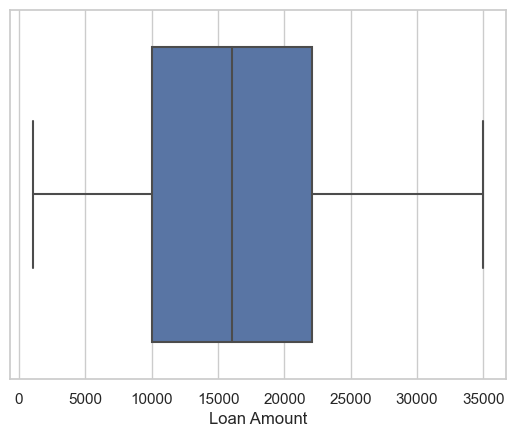

In [132]:
col=df[['Loan Amount']]
for i in col:
    plt.figure()
    sns.boxplot(df[i])

In [133]:
df['Term'].value_counts()

59.0    43262
58.0    21978
36.0     1443
Name: Term, dtype: int64

In [134]:
# filling missing values
df['Loan Amount'].fillna(df['Loan Amount'].mean(),inplace=True)
df['Term'].fillna(df['Term'].median(),inplace=True)

In [135]:
df['Term'].median(),df['Loan Amount'].mean()

(59.0, 16846.89053775401)

In [136]:
# checking Duplicates
df.duplicated().sum()

98

- We must eliminate the duplicate values to ensure data accuracy and integrity. 
- These duplicate values could result in biased analysis and model training.
- Eliminating the duplicates helps in preventing overfitting and ensuring machine learning models are not skewed by redundant information. 

In [137]:
df.drop_duplicates(inplace=True)

In [138]:
df.isna().sum()

ID                              0
Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Home Ownership                  0
Employment Duration             0
Verification Status             0
Payment Plan                    0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Application Type                0
Last week Pay 

- The dataset is now clean. There are no more missing values.

In [139]:
# Target variable (Loan Status)

In [140]:
status_percentage=(df['Loan Status'].value_counts()/len(df)*100)
status_percentage

0    90.749277
1     9.250723
Name: Loan Status, dtype: float64

In [141]:
status_percentage=(df['Loan Status'].value_counts(normalize=True))

In [142]:
status_percentage

0    0.907493
1    0.092507
Name: Loan Status, dtype: float64

<AxesSubplot:ylabel='Loan Status'>

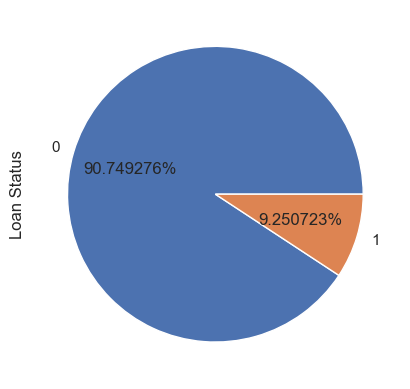

In [269]:
df['Loan Status'].value_counts().plot(kind='pie',autopct='%f%%')

- 90.75% of the loan entries are non-defaulted loans (Loan Status = 0), while only 9.25% are defaulted loans (Loan Status = 1).

In [144]:
# Descriptive statistics for numerical columns
df.describe()


,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Employment Duration,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
count,6.746500e+04,67465.000000,67465.000000,67465.000000,67465.000000,67465.000000,67465.000000,67465.000000,67465.000000,67465.000000,67465.000000,67465.000000,67465.000000,67465.000000,67465.000000,67465.000000,67465.000000,67465.000000,67465.000000,67465.000000,67465.000000,67465.0,67465.000000,6.746500e+04,67465.000000,67465.000000
mean,2.562732e+07,16845.421069,15770.481628,14621.685233,58.184244,11.846209,80541.765562,23.299360,0.327133,0.145750,14.266597,0.081435,7699.351353,52.889615,18.627792,2068.982844,1.143937,59.689834,1.125138,0.021315,71.164144,0.0,146.465263,1.595733e+05,23122.552983,0.092507
std,2.109131e+07,8295.719950,8150.900425,6785.286744,3.308055,3.718595,45028.737065,8.451823,0.800882,0.473285,6.225072,0.346601,7836.085594,22.539509,8.319190,2221.889908,5.244291,357.021198,3.489833,0.144432,43.315659,0.0,744.371368,1.390326e+05,20916.576230,0.289743
min,1.297933e+06,1014.000000,1014.000000,1114.590204,36.000000,5.320006,14573.537170,0.675299,0.000000,0.000000,2.000000,0.000000,0.000000,0.005172,4.000000,4.736746,0.000003,0.000036,0.000036,0.000000,0.000000,0.0,1.000000,6.170000e+02,1000.000000,0.000000
25%,6.570935e+06,10122.000000,9267.000000,9831.489908,58.000000,9.297124,51690.870040,16.756527,0.000000,0.000000,10.000000,0.000000,2557.000000,38.658635,13.000000,570.911731,0.021114,1.629720,0.476272,0.000000,35.000000,0.0,24.000000,5.037800e+04,8155.000000,0.000000
50%,1.791565e+07,16212.000000,13041.000000,12793.682170,59.000000,11.377696,69335.832680,22.656658,0.000000,0.000000,13.000000,0.000000,5516.000000,54.082334,18.000000,1330.842771,0.043398,3.344498,0.780141,0.000000,68.000000,0.0,36.000000,1.183690e+05,16732.000000,0.000000
75%,4.271360e+07,21983.000000,21793.000000,17806.334480,59.000000,14.193369,94624.724420,30.048472,0.000000,0.000000,16.000000,0.000000,10185.000000,69.177512,23.000000,2656.882211,0.071884,5.453686,1.070572,0.000000,105.000000,0.0,46.000000,2.283850e+05,32145.000000,0.000000
max,7.224578e+07,35000.000000,34999.000000,34999.746430,59.000000,27.182348,406561.536400,39.629862,8.000000,5.000000,37.000000,4.000000,116933.000000,100.880050,72.000000,14301.368310,42.618882,4354.467419,166.833000,1.000000,161.000000,0.0,16421.000000,1.177412e+06,201169.000000,1.000000


- ID

Let's take a look at the features that bring no information to our problem. As we can see, there are 67463 different values for ID, the same quantity of rows we have in the train dataset. We are going to exclude the ID column.

In [145]:
df['ID'].nunique()

67463

In [146]:
df.drop(['ID'],axis=1,inplace=True)

- Now in preprocessing i am checking shape,outliers,skewness and kurtosis of numeric features.<br>
  If skewness kurtosis not in range , I am trying to maintain keep it in range

- And for categorical column I am doing encoding 

- Loan Amount

C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<AxesSubplot:xlabel='Loan Amount', ylabel='Density'>

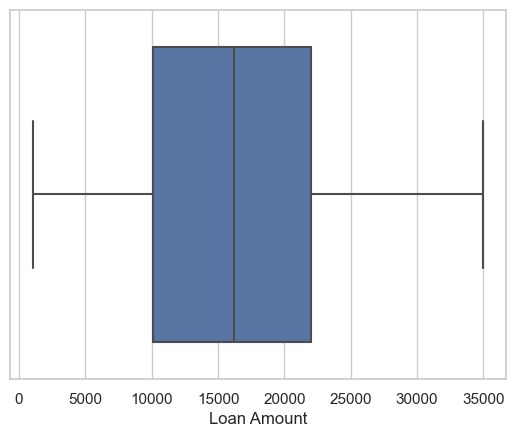

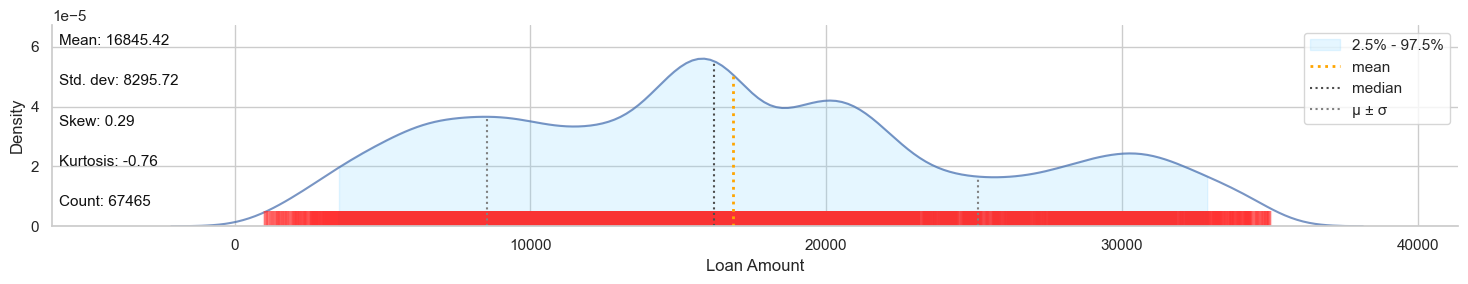

In [147]:

sns.boxplot(df['Loan Amount'])
kb.dist_plot(df['Loan Amount'])


 - Funded Amount

C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<AxesSubplot:xlabel='Funded Amount', ylabel='Density'>

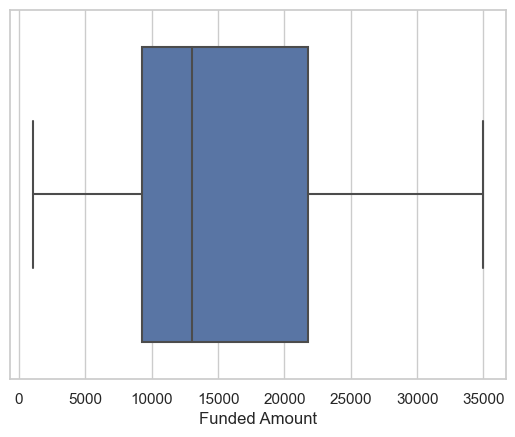

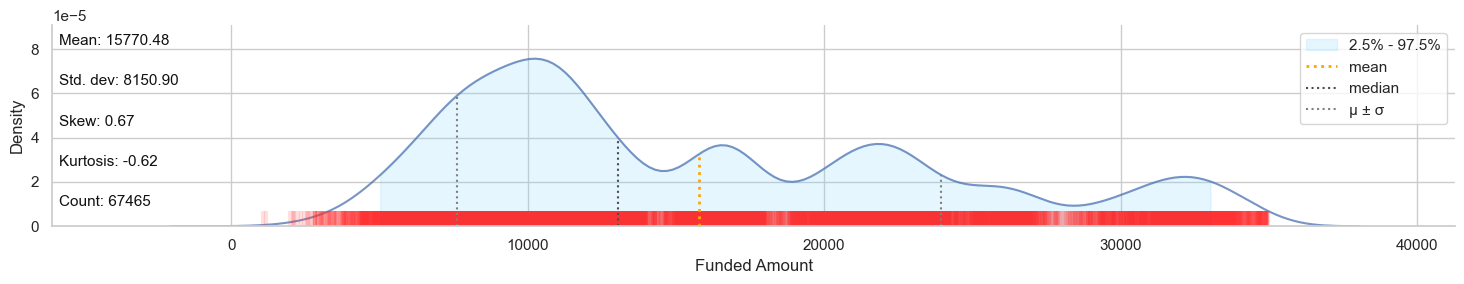

In [148]:
sns.set_theme(style="whitegrid")
sns.boxplot(df['Funded Amount'])
kb.dist_plot(df['Funded Amount'])

C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<AxesSubplot:xlabel='Funded Amount Investor', ylabel='Density'>

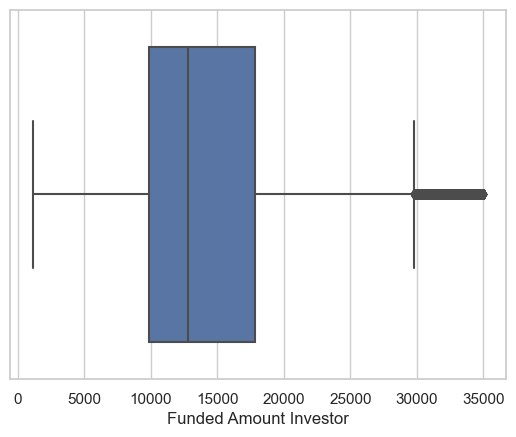

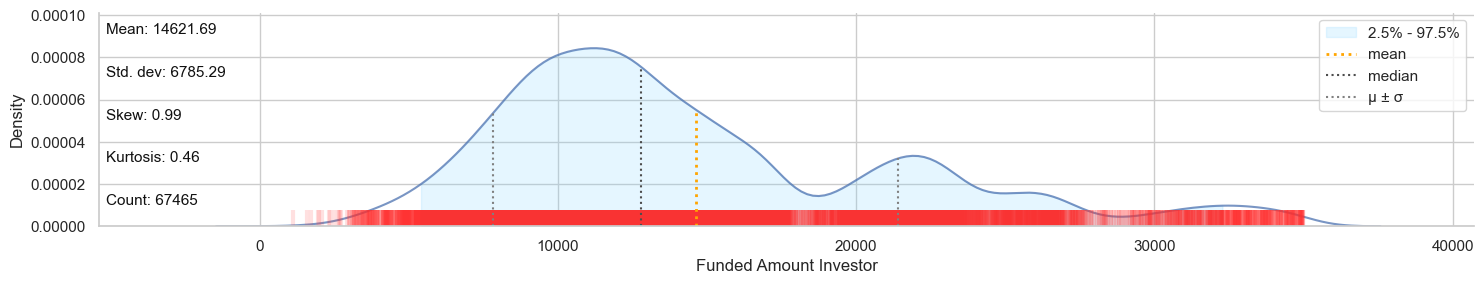

In [149]:
sns.set_theme(style="whitegrid")
sns.boxplot(df['Funded Amount Investor'])
kb.dist_plot(df['Funded Amount Investor'])


- here outliers are present so I'm going to do data transformation on this feature

C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<AxesSubplot:xlabel='Funded Amount Investor', ylabel='Density'>

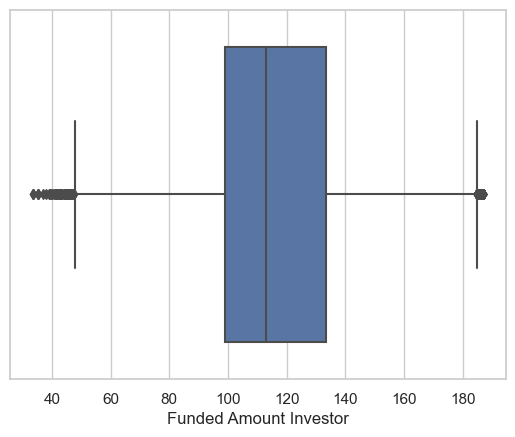

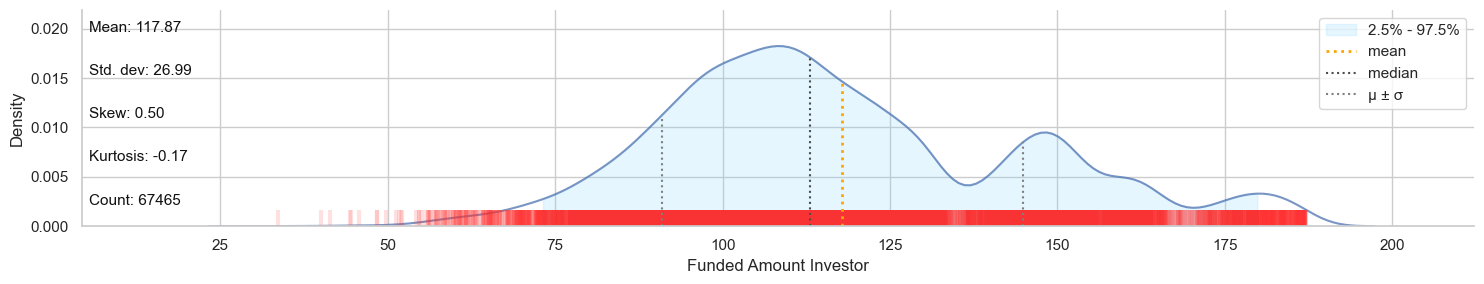

In [150]:
x=np.sqrt(df['Funded Amount Investor'])
sns.set_theme(style="whitegrid")
sns.boxplot(x)
kb.dist_plot(x)


Text(0.5, 1.0, 'Payment Plan')

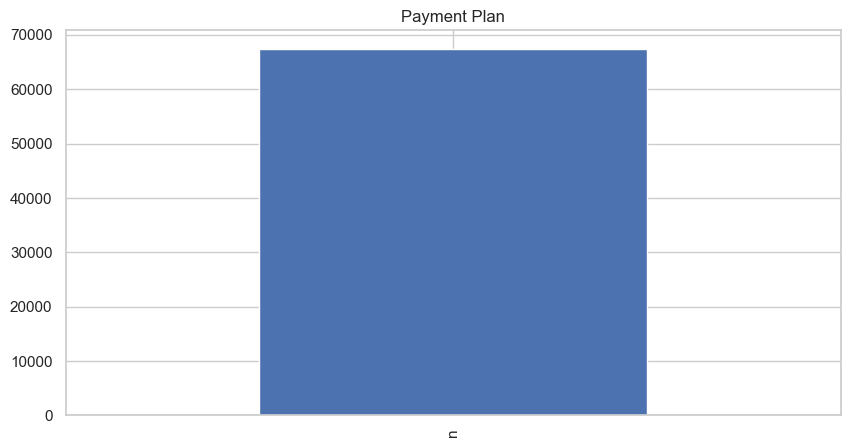

In [151]:
df['Payment Plan'].value_counts().plot(kind='bar',figsize=(10,5))
plt.title('Payment Plan')

- Batch Enrolled

Text(0.5, 1.0, 'Batch Enrolled')

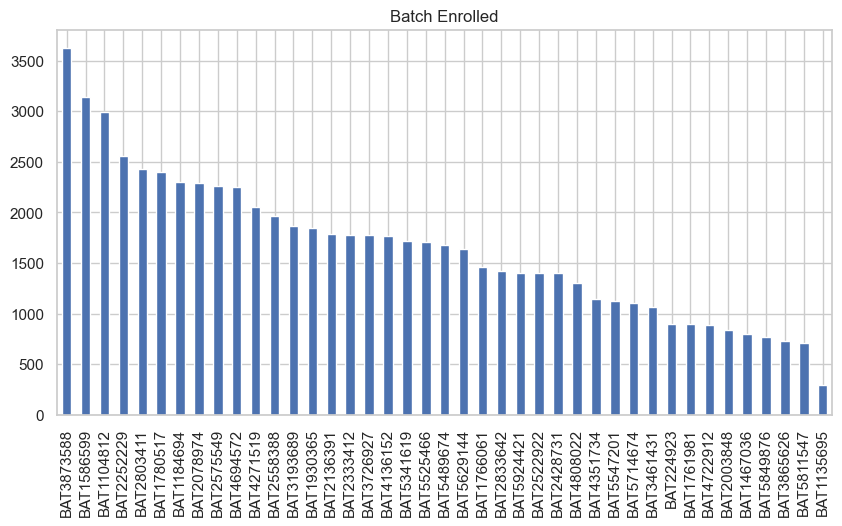

In [152]:
df['Batch Enrolled'].value_counts().plot(kind='bar',figsize=(10,5))
plt.title('Batch Enrolled')

In [153]:
# I am going to make a dataframe containing the % of defaulters for each batch.
count_Batch_Enrolled=df.groupby('Batch Enrolled').count().sort_values(by='Loan Status',ascending=False).reset_index()[['Batch Enrolled','Grade']]
sum_Batch_Enrolled=df.groupby('Batch Enrolled').sum().sort_values(by='Loan Status',ascending=False).reset_index()[['Batch Enrolled','Loan Status']]
countsum_Batch_Enrolled=pd.merge(count_Batch_Enrolled,sum_Batch_Enrolled, how='inner', on='Batch Enrolled')
countsum_Batch_Enrolled['Batch_Enrolled%']=countsum_Batch_Enrolled['Loan Status']/countsum_Batch_Enrolled['Grade']
countsum_Batch_Enrolled.sort_values(by='Batch_Enrolled%').reset_index()


,index,Batch Enrolled,Grade,Loan Status,Batch_Enrolled%
0,38,BAT3865626,728,57,0.078297
1,16,BAT3726927,1774,139,0.078354
2,24,BAT5924421,1404,112,0.079772
3,6,BAT1184694,2298,192,0.083551
4,17,BAT4136152,1767,148,0.083758
5,20,BAT5489674,1677,141,0.084079
6,30,BAT5714674,1105,93,0.084163
7,31,BAT3461431,1068,90,0.084270
8,22,BAT1766061,1461,124,0.084873
9,15,BAT2333412,1775,152,0.085634


In [154]:
countsum_Batch_Enrolled['Batch_Enrolled%'].describe()

count    41.000000
mean      0.092906
std       0.008739
min       0.078297
25%       0.086559
50%       0.093750
75%       0.096956
max       0.125000
Name: Batch_Enrolled%, dtype: float64

- Now I am creating four categories of Bath_enrolled by default percentage in ascending order

In [155]:
countsum_Batch_Enrolled['Classe_Batch_Enrolled']=0
countsum_Batch_Enrolled.loc[countsum_Batch_Enrolled['Batch_Enrolled%']<0.08997275, 'Classe_Batch_Enrolled']=0
countsum_Batch_Enrolled.loc[(countsum_Batch_Enrolled['Batch_Enrolled%']>=0.08997275)&(countsum_Batch_Enrolled['Batch_Enrolled%']<0.1016485), 'Classe_Batch_Enrolled']=1
countsum_Batch_Enrolled.loc[(countsum_Batch_Enrolled['Batch_Enrolled%']>=0.1016485)&(countsum_Batch_Enrolled['Batch_Enrolled%']<0.11332425), 'Classe_Batch_Enrolled']=2
countsum_Batch_Enrolled.loc[countsum_Batch_Enrolled['Batch_Enrolled%']>=0.11332425, 'Classe_Batch_Enrolled']=3

In [156]:
countsum_Batch_Enrolled=countsum_Batch_Enrolled[['Batch Enrolled', 'Classe_Batch_Enrolled']]
#Let's merge the Countsum Batch_Enrolled with the df. Then we are going to exclude the original feature.

In [157]:
df=pd.merge(df, countsum_Batch_Enrolled, how='inner', on='Batch Enrolled')
df.head(1)


,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Home Ownership,Employment Duration,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status,Classe_Batch_Enrolled
0,33018.0,11760,8911.377904,59.0,BAT1586599,16.200249,B,G1,MORTGAGE,67374.9541,Source Verified,n,Credit card refinancing,25.78039,0,0,36,0,1670,56.114276,33,f,1719.768936,0.002127,0.040202,1.005686,0,INDIVIDUAL,2,0,50,48379,4599,0,2


In [158]:
df.drop(['Batch Enrolled'],axis=1,inplace=True)   #now drop original feature

<AxesSubplot:xlabel='batch'>

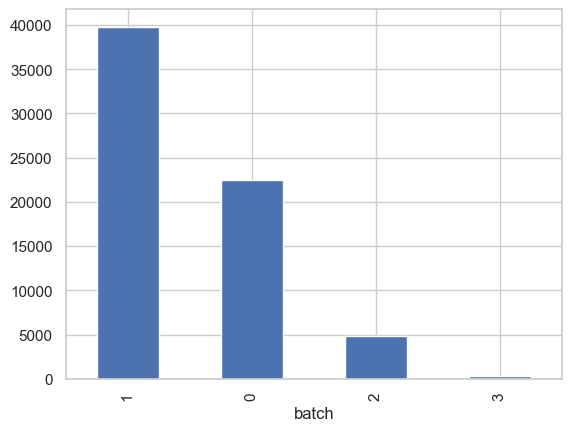

In [159]:
df['Classe_Batch_Enrolled'].value_counts().plot(kind='bar',xlabel='batch')

In [160]:
df['Classe_Batch_Enrolled'].value_counts()

1    39806
0    22484
2     4879
3      296
Name: Classe_Batch_Enrolled, dtype: int64

 - 'Interest Rate'

C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<AxesSubplot:xlabel='Interest Rate', ylabel='Density'>

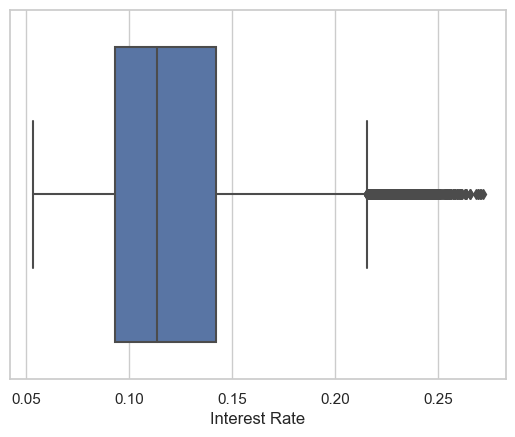

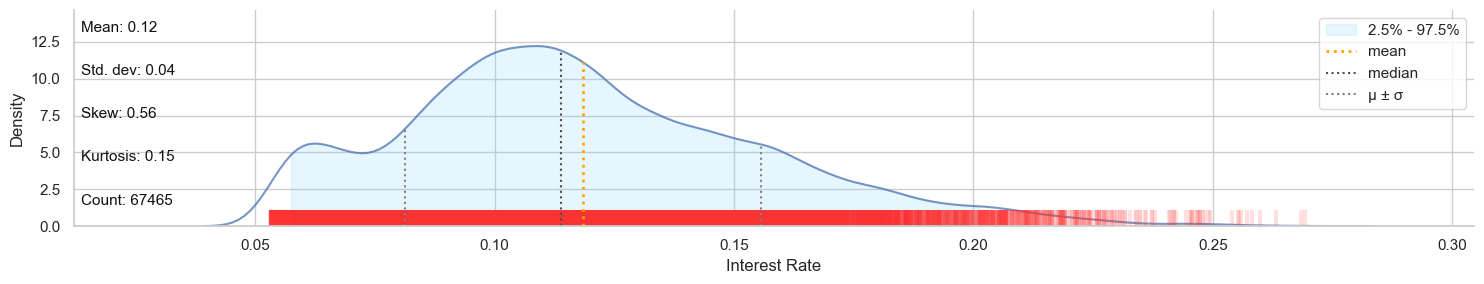

In [161]:
df['Interest Rate']=df['Interest Rate']/100
sns.set_theme(style="whitegrid")
sns.boxplot(df['Interest Rate'])
kb.dist_plot(df['Interest Rate'])

C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<AxesSubplot:xlabel='Interest Rate', ylabel='Density'>

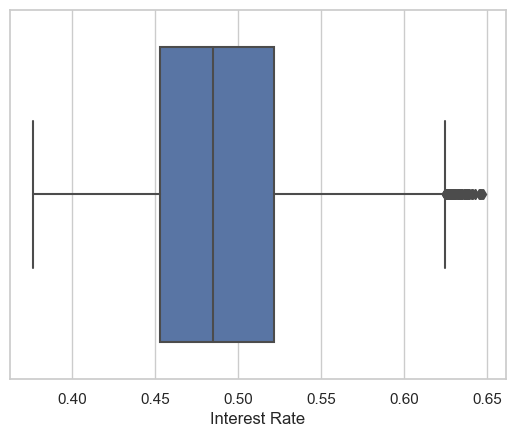

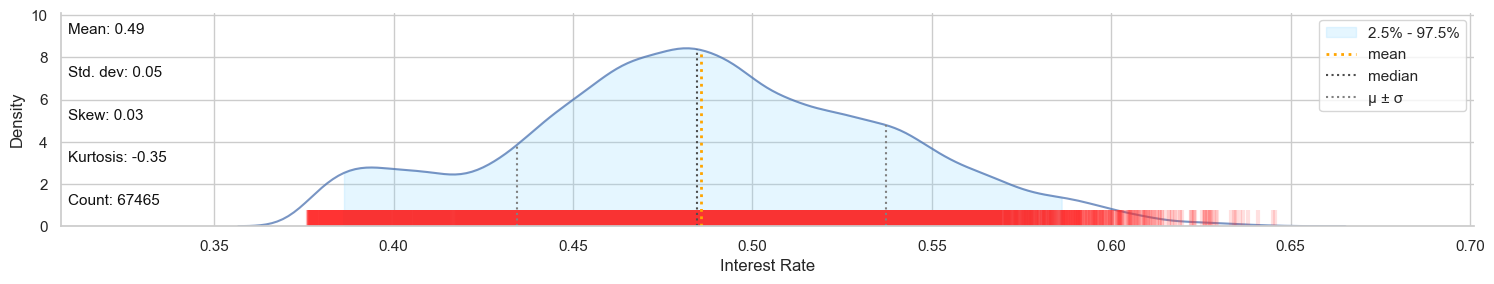

In [162]:
x=np.cbrt(df['Interest Rate'])
sns.set_theme(style="whitegrid")
sns.boxplot(x)
kb.dist_plot(x)

In [163]:
df['Interest Rate']=np.cbrt(df['Interest Rate'])

- Grade

Text(0.5, 1.0, 'Count of Loans by Grade')

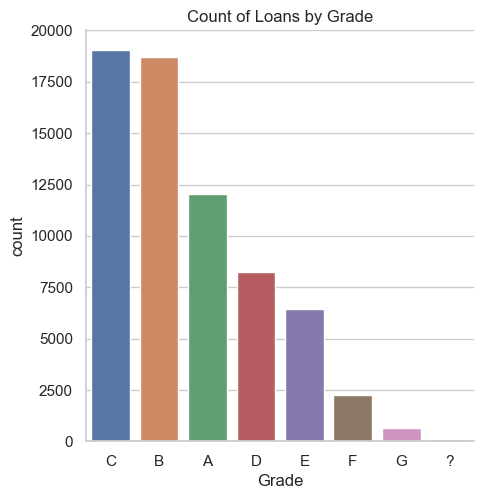

In [164]:
sns.catplot(data=df, x='Grade', order=df['Grade'].value_counts().index,kind='count')
plt.title('Count of Loans by Grade')


- In Grade column there are 7 unique values so i convert categorical data to numeric
- And '?' replaced by majourity grade

In [165]:
df['Grade']=df['Grade'].replace({'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':5,'?':2})

- Sub Grade

Text(0.5, 1.0, 'Sub grade')

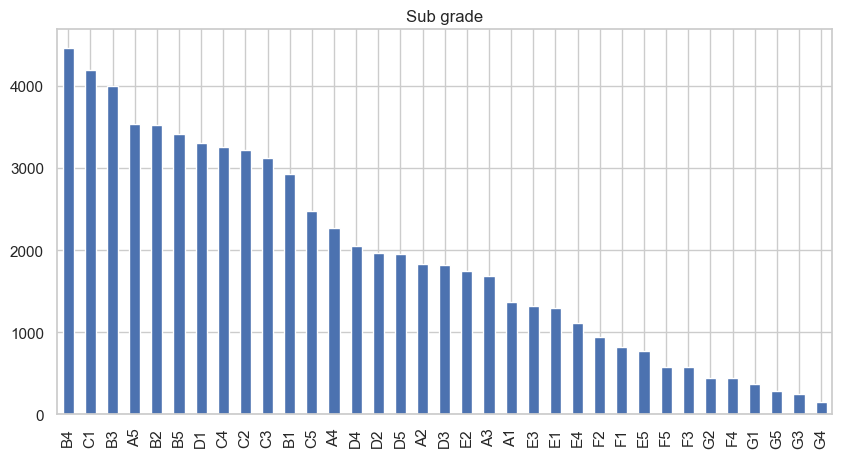

In [166]:
df['Sub Grade'].value_counts().plot(kind='bar',figsize=(10,5))
plt.title('Sub grade')

In subgrade column there are 35 categories we convert it into numerical by label encoding

In [167]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Sub Grade']=le.fit_transform(df['Sub Grade'])

- Home Ownership

<AxesSubplot:>

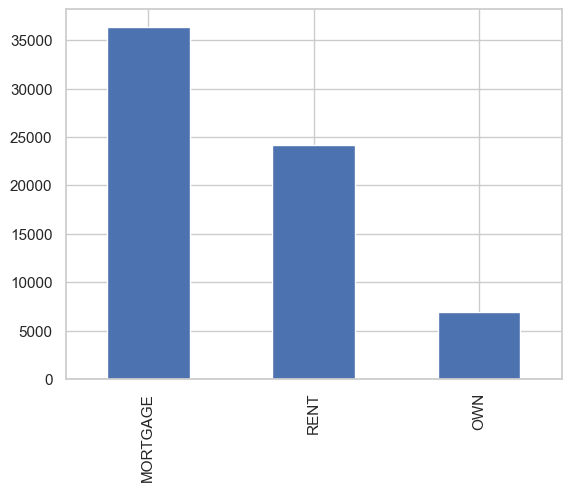

In [168]:
df['Home Ownership'].value_counts().plot(kind='bar')

In [169]:
df['Home Ownership']=df['Home Ownership'].replace({'OWN':0,'RENT':1,'MORTGAGE':2})

 - Verification Status

<AxesSubplot:>

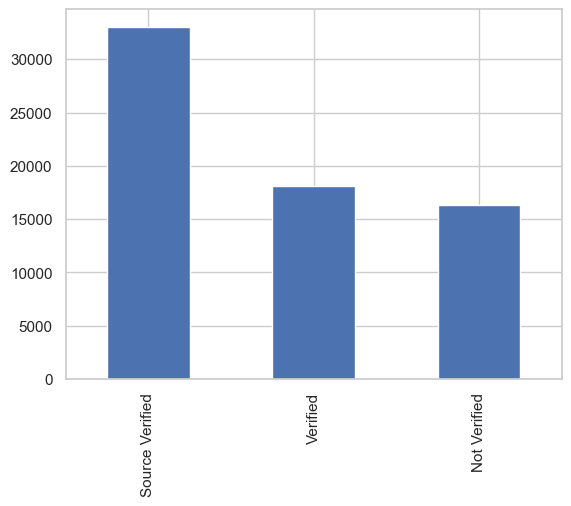

In [170]:
df['Verification Status'].value_counts().plot(kind='bar')

In [171]:
df['Verification Status']=df['Verification Status'].replace({'Source Verified':0,'Verified':0,'Not Verified':1})

-Employment Duration

C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<AxesSubplot:xlabel='Employment Duration', ylabel='Density'>

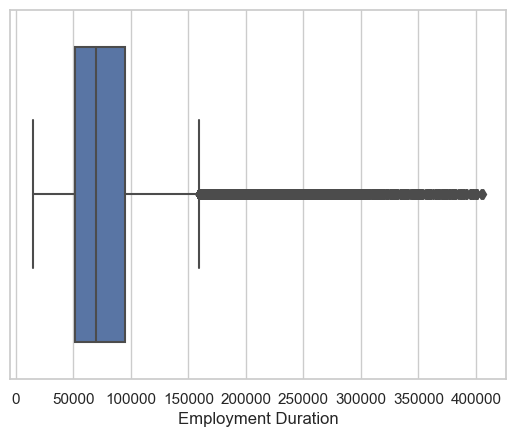

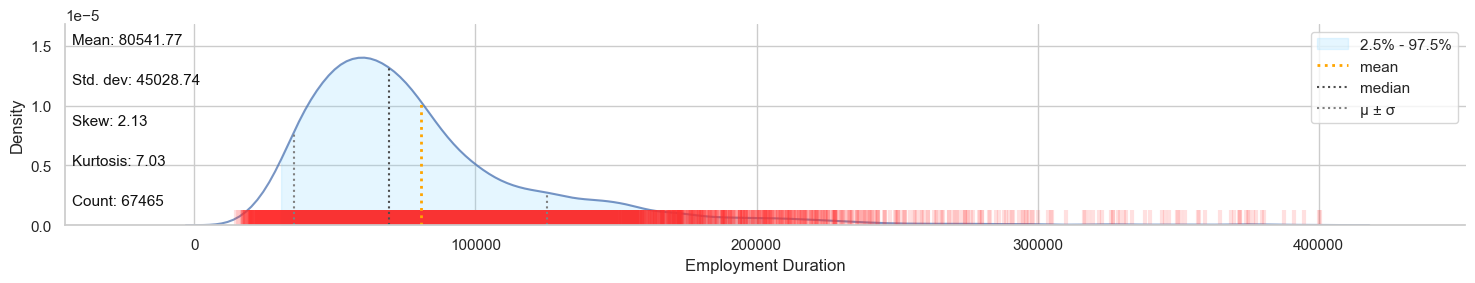

In [172]:
sns.set_theme(style="whitegrid")
sns.boxplot(df['Employment Duration'])
kb.dist_plot(df['Employment Duration'])

C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<AxesSubplot:xlabel='Employment Duration', ylabel='Density'>

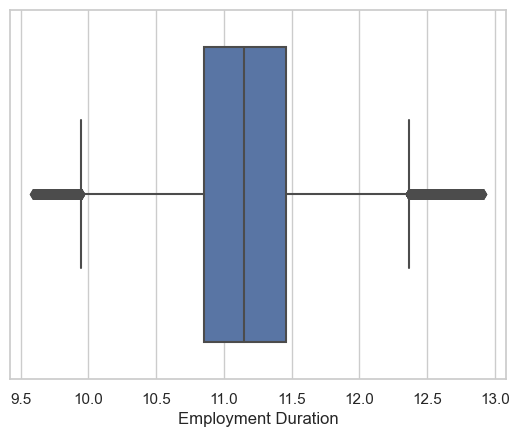

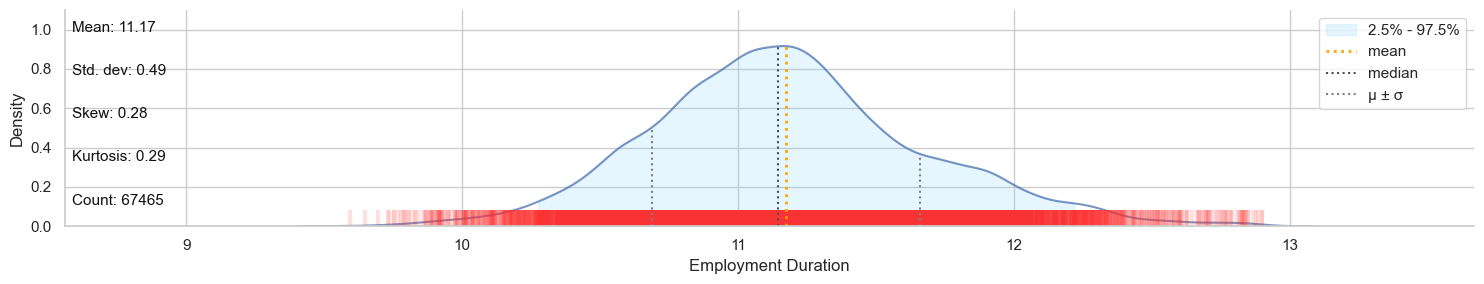

In [173]:
x=np.log(df['Employment Duration'])
sns.set_theme(style="whitegrid")
sns.boxplot(x)
kb.dist_plot(x)

In [174]:
df['Employment Duration']=np.log(df['Employment Duration'])  

- Payment Plan
  1. As this feature only has one class, it won't bring any information to our model. We are going to drop it.

In [175]:
df['Payment Plan'].value_counts()

n    67465
Name: Payment Plan, dtype: int64

In [176]:
df.drop(['Payment Plan'],axis=1,inplace=True)

-Loan Title

In [177]:
df['Loan Title'].value_counts().head(20)

Credit card refinancing      30728
Debt consolidation           24842
Debt Consolidation            3545
Other                         2455
Home improvement              2211
Major purchase                 487
Medical expenses               237
Business                       183
Moving and relocation          157
Car financing                  135
Vacation                       114
debt consolidation             105
Consolidation                   97
Home buying                     94
Personal Loan                   78
Debt Consolidation Loan         71
Home Improvement                68
Credit Card Consolidation       68
Consolidate                     55
Consolidation Loan              55
Name: Loan Title, dtype: int64

- _Credit card refinancing is the leading loan type followed byb debt consolidation_
- _there are two categories of Debt consolition and they are different with respect to the spelling only_

In [178]:
countsum_LoanTitle=df.copy()
countsum_LoanTitle['Contador']=1
countsum_LoanTitle=countsum_LoanTitle.groupby('Loan Title').sum().reset_index()[['Loan Title', 'Contador', 'Loan Status']]
countsum_LoanTitle['LoanTitle%']=countsum_LoanTitle['Loan Status']/countsum_LoanTitle['Contador']
countsum_LoanTitle.sort_values(by='LoanTitle%', ascending=True).head(60)

,Loan Title,Contador,Loan Status,LoanTitle%
108,vacation,10,0,0.000000
43,Debt Consolidation 2013,6,0,0.000000
50,Debt payoff,7,0,0.000000
26,Credit Card Paydown,9,0,0.000000
21,Credit,4,0,0.000000
72,Medical loan,9,0,0.000000
18,Consolidated,13,0,0.000000
80,Personal loan,5,0,0.000000
13,Car Loan,9,0,0.000000
12,CONSOLIDATION,9,0,0.000000


In [179]:
countsum_LoanTitle['Classe_LoanTitle']=0
countsum_LoanTitle.loc[countsum_LoanTitle['LoanTitle%']<0.064516, 'Classe_LoanTitle']=0
countsum_LoanTitle.loc[(countsum_LoanTitle['LoanTitle%']>=0.064516)&(countsum_LoanTitle['LoanTitle%']<0.098563), 'Classe_LoanTitle']=1
countsum_LoanTitle.loc[(countsum_LoanTitle['LoanTitle%']>=0.098563)&(countsum_LoanTitle['LoanTitle%']<0.142857), 'Classe_LoanTitle']=2
countsum_LoanTitle.loc[countsum_LoanTitle['LoanTitle%']>=0.142857, 'Classe_LoanTitle']=3


In [180]:
countsum_LoanTitle=countsum_LoanTitle[['Loan Title', 'Classe_LoanTitle']]

In [181]:
df=pd.merge(df, countsum_LoanTitle, how='inner', on='Loan Title')

In [182]:
df.drop('Loan Title', axis=1,inplace=True)

- Initial List Status

<AxesSubplot:>

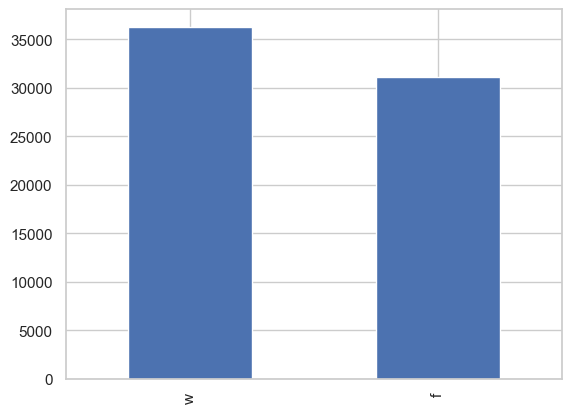

In [183]:
df['Initial List Status'].value_counts().plot(kind='bar')

In [184]:
df['Initial List Status']=df['Initial List Status'].replace({'f':0,'w':1})

- Revolving Balance

C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<AxesSubplot:xlabel='Revolving Balance', ylabel='Density'>

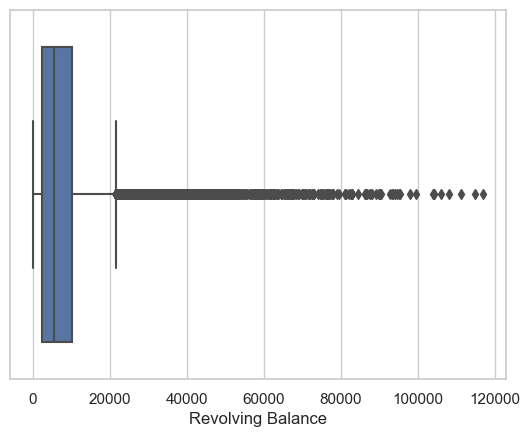

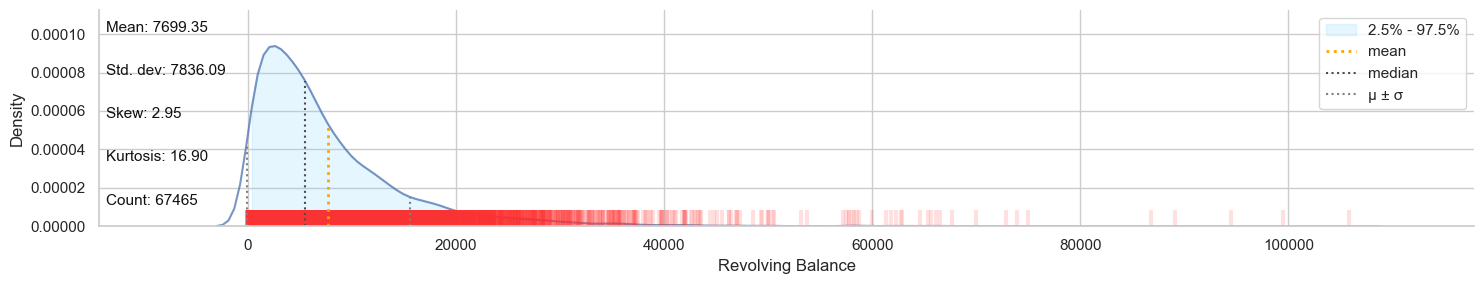

In [185]:
sns.set_theme(style="whitegrid")
sns.boxplot(df['Revolving Balance'])
kb.dist_plot(df['Revolving Balance'])

C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<AxesSubplot:xlabel='Revolving Balance', ylabel='Density'>

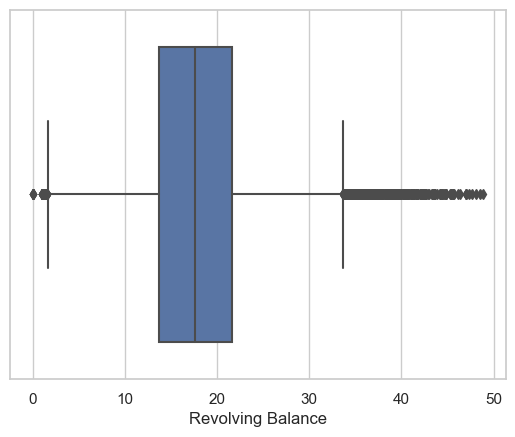

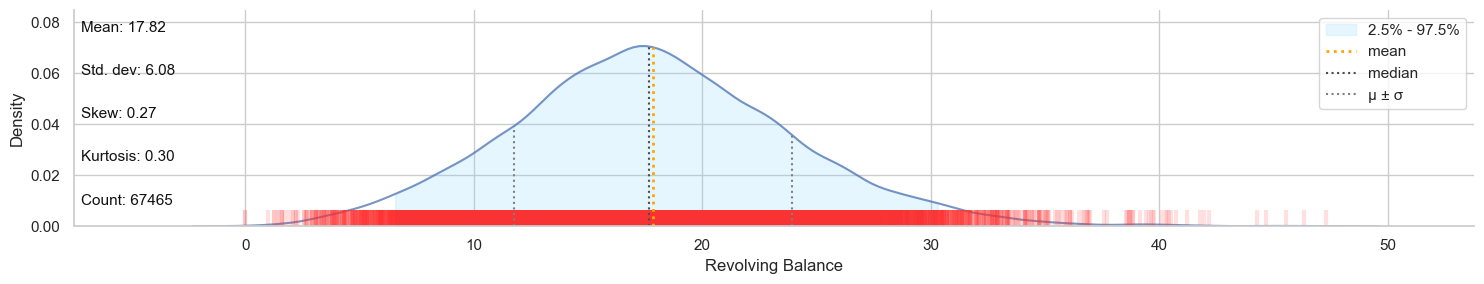

In [186]:
x=np.cbrt(df['Revolving Balance'])
sns.set_theme(style="whitegrid")
sns.boxplot(x)
kb.dist_plot(x)

In [187]:
df['Revolving Balance']=np.cbrt(df['Revolving Balance'])

- Total Received Interest

C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<AxesSubplot:xlabel='Total Received Interest', ylabel='Density'>

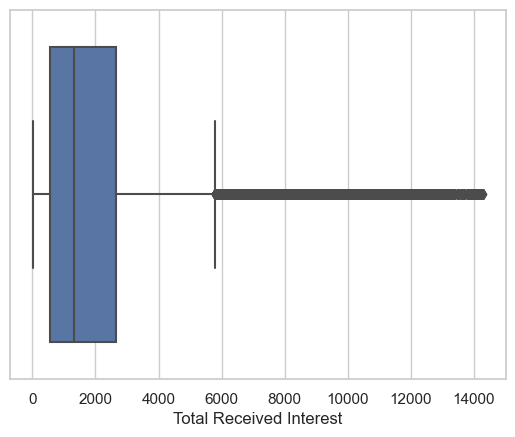

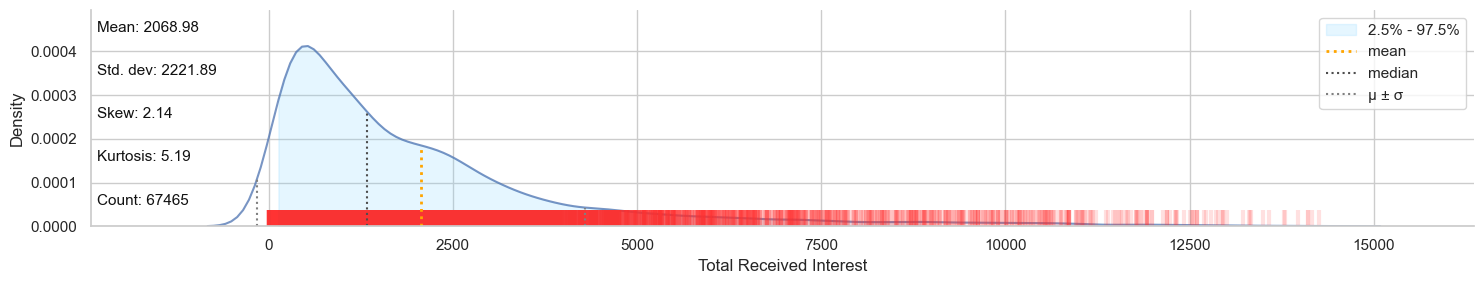

In [188]:
sns.set_theme(style="whitegrid")
sns.boxplot(df['Total Received Interest'])
kb.dist_plot(df['Total Received Interest'])

C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<AxesSubplot:xlabel='Total Received Interest', ylabel='Density'>

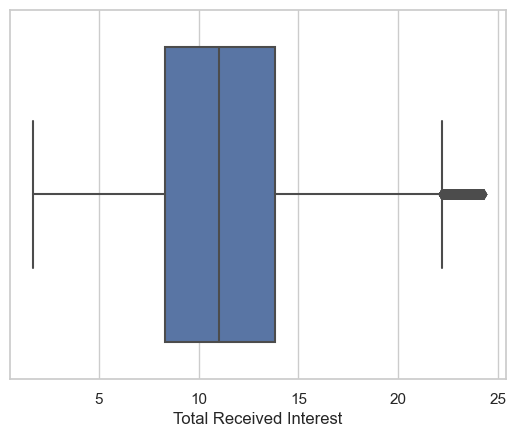

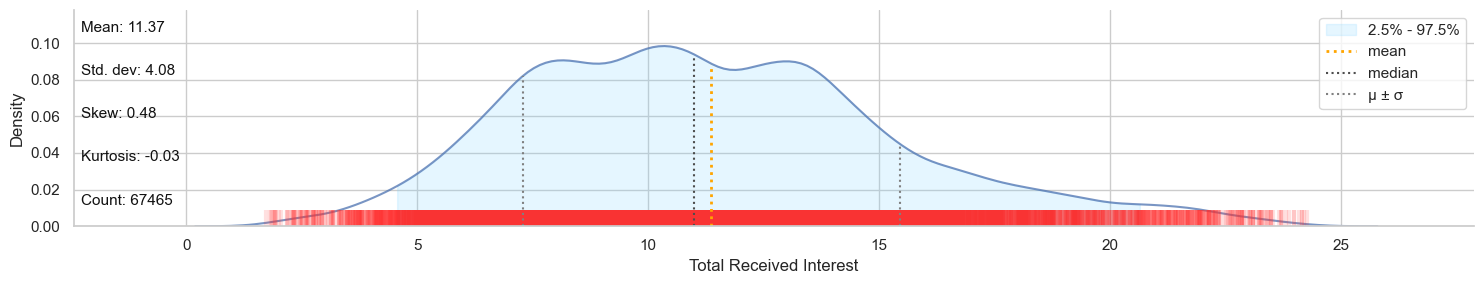

In [189]:
x=np.cbrt(df['Total Received Interest'])
sns.set_theme(style="whitegrid")
sns.boxplot(x)
kb.dist_plot(x)

In [190]:
df['Total Received Interest']=np.cbrt(df['Total Received Interest'])

- Application Type

Text(0.5, 1.0, 'Application Type')

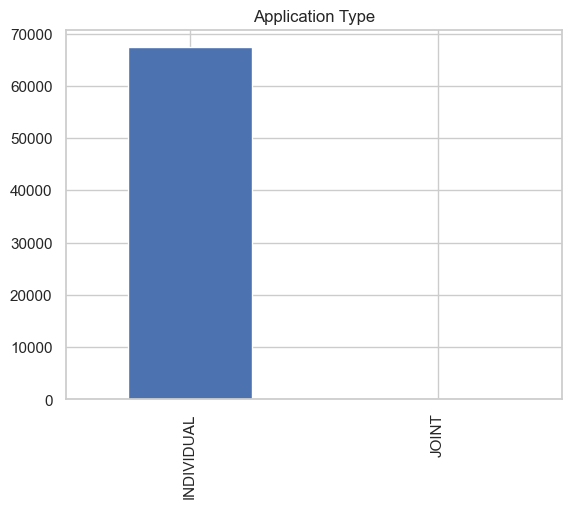

In [191]:
df['Application Type'].value_counts().plot(kind='bar')
plt.title('Application Type')

- most of the applicants are individuals so i am going to drop this column

In [192]:
df.drop(['Application Type'],axis=1,inplace=True)

- Total Current Balance

C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<AxesSubplot:xlabel='Total Current Balance', ylabel='Density'>

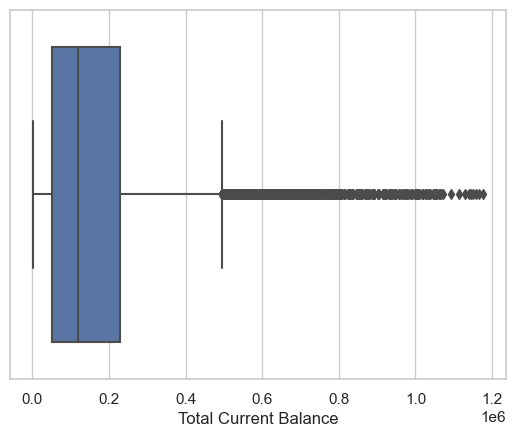

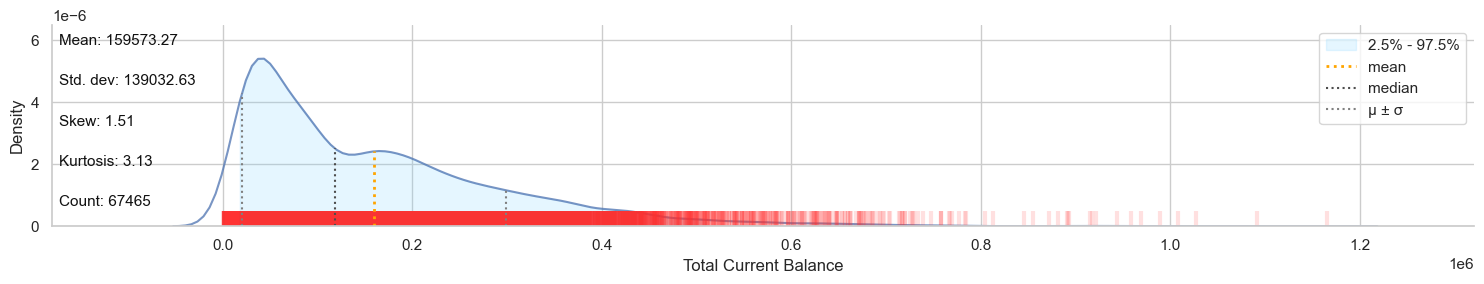

In [193]:
sns.set_theme(style="whitegrid")
sns.boxplot(df['Total Current Balance'])
kb.dist_plot(df['Total Current Balance'])

C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<AxesSubplot:xlabel='Total Current Balance', ylabel='Density'>

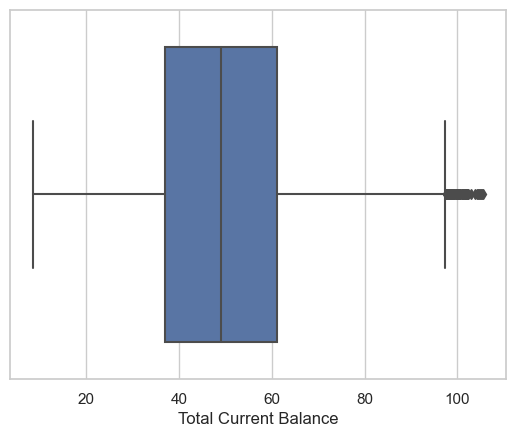

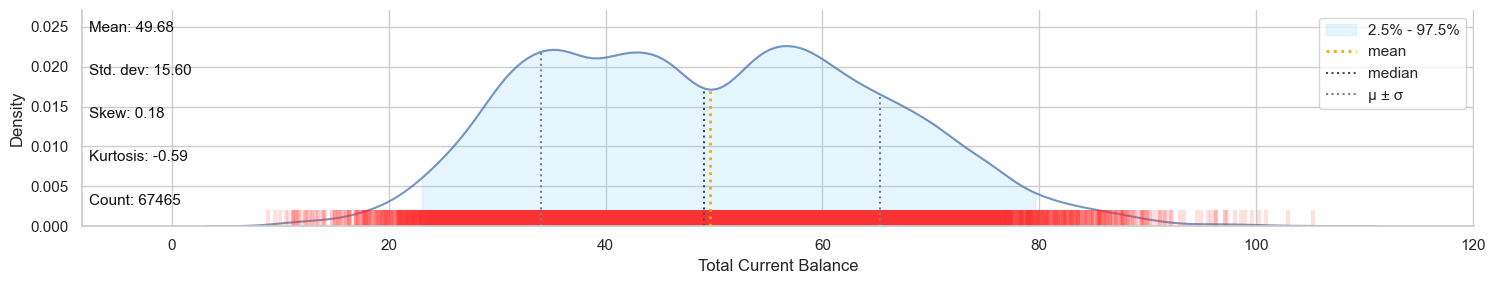

In [194]:
x=np.cbrt(df['Total Current Balance'])
sns.set_theme(style="whitegrid")
sns.boxplot(x)
kb.dist_plot(x)

In [195]:
df['Total Current Balance']=np.cbrt(df['Total Current Balance'])

 - 'Total Revolving Credit Limit'

C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<AxesSubplot:xlabel='Total Revolving Credit Limit', ylabel='Density'>

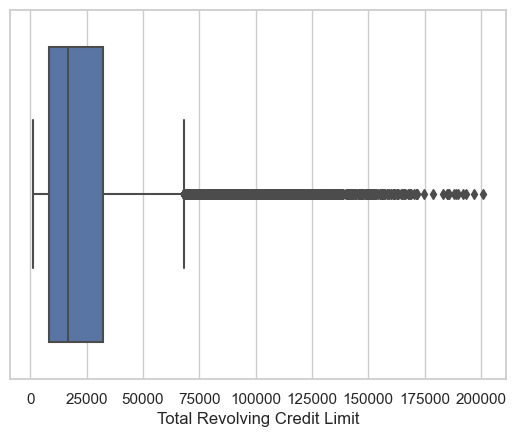

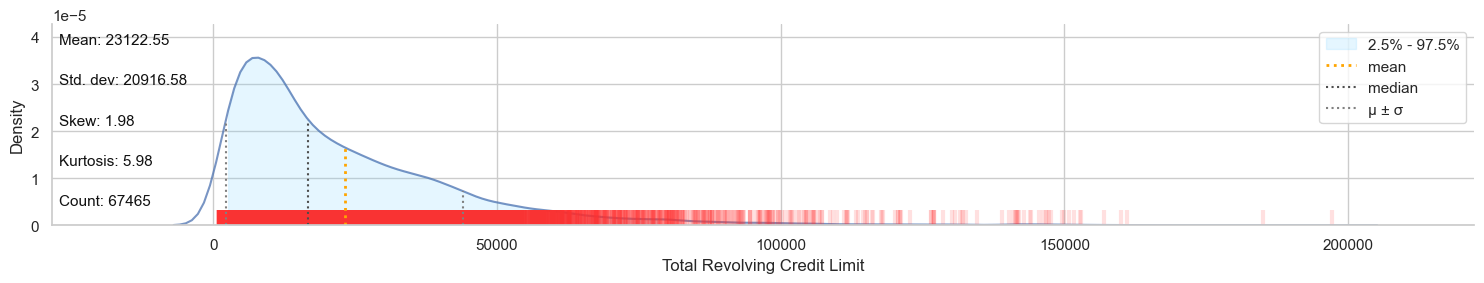

In [196]:
sns.set_theme(style="whitegrid")
sns.boxplot(df['Total Revolving Credit Limit'])
kb.dist_plot(df['Total Revolving Credit Limit'])

In [197]:
df['Total Revolving Credit Limit']=np.cbrt(df['Total Revolving Credit Limit'])

- Total Received Late Fee

C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<AxesSubplot:xlabel='Total Received Late Fee', ylabel='Density'>

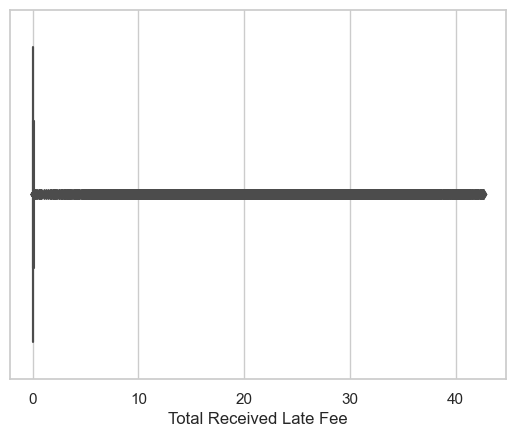

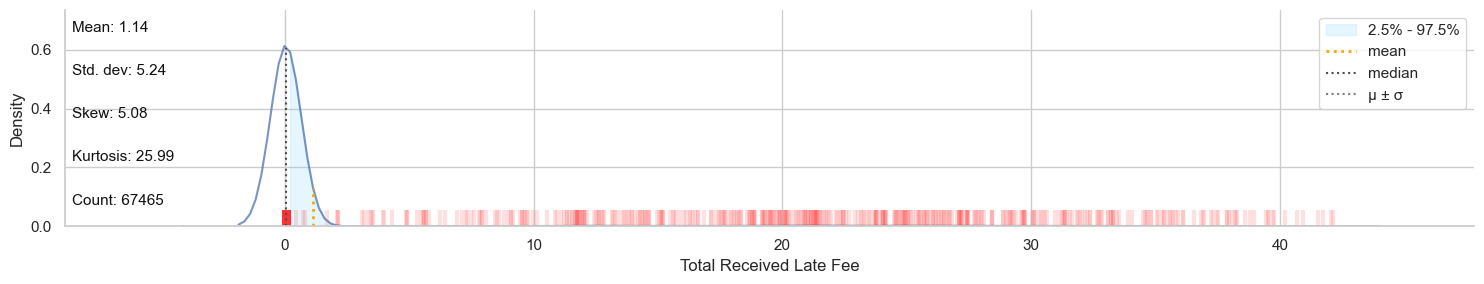

In [198]:
sns.set_theme(style="whitegrid")
sns.boxplot(df['Total Received Late Fee'])
kb.dist_plot(df['Total Received Late Fee'])

C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<AxesSubplot:xlabel='Total Received Late Fee', ylabel='Density'>

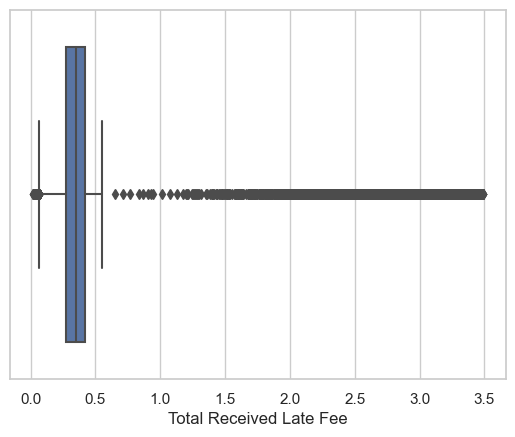

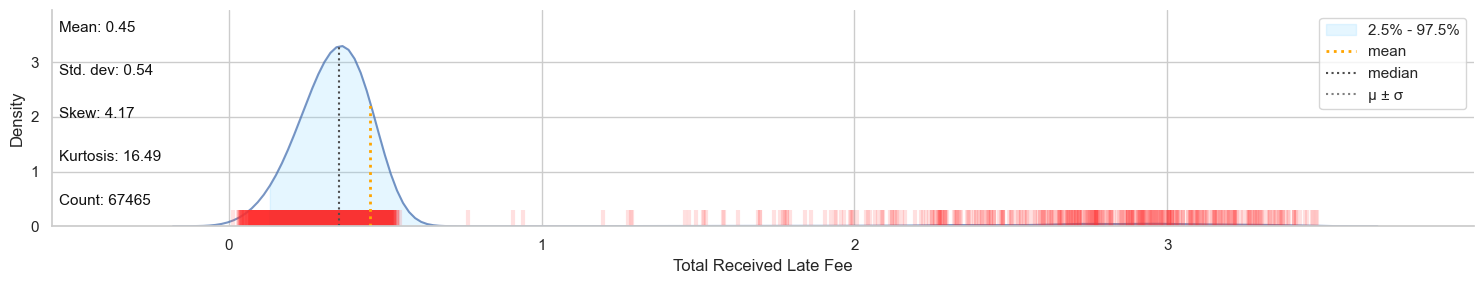

In [199]:
x=np.cbrt(df['Total Received Late Fee'])
sns.boxplot(x)
kb.dist_plot(x)

In [200]:
df['Total Received Late Fee']=np.cbrt(df['Total Received Late Fee'])

- Last week pay

In [201]:
# I am going to make a dataframe containing the % of defaulters for each category.
count=df.groupby('Last week Pay').count().sort_values(by='Loan Status',ascending=False).reset_index()[['Last week Pay','Grade']]
sum1=df.groupby('Last week Pay').sum().sort_values(by='Loan Status',ascending=False).reset_index()[['Last week Pay','Loan Status']]
countsum_last_week_pay=pd.merge(count,sum1, how='inner', on='Last week Pay')
countsum_last_week_pay['last week pay %']=countsum_last_week_pay['Loan Status']/countsum_last_week_pay['Grade']
countsum_last_week_pay.sort_values(by='last week pay %').reset_index(inplace=True)
countsum_last_week_pay

,Last week Pay,Grade,Loan Status,last week pay %
0,14,743,60,0.080754
1,13,729,64,0.087791
2,12,714,56,0.078431
3,11,713,71,0.099579
4,10,710,73,0.102817
...,...,...,...,...
157,2,203,16,0.078818
158,160,174,9,0.051724
159,161,163,19,0.116564
160,1,141,11,0.078014


In [202]:
countsum_last_week_pay['last week pay %'].describe()

count    162.000000
mean       0.092824
std        0.016037
min        0.051724
25%        0.082178
50%        0.092672
75%        0.103640
max        0.137405
Name: last week pay %, dtype: float64

In [203]:
countsum_last_week_pay['Classe_last_week_pay']=0
countsum_last_week_pay.iloc[0:40,[-1]]=0
countsum_last_week_pay.iloc[41:80,[-1]]=1
countsum_last_week_pay.iloc[81:120,[-1]]=2
countsum_last_week_pay.iloc[121:,[-1]]=3

In [204]:
countsum_last_week_pay=countsum_last_week_pay[['Last week Pay', 'Classe_last_week_pay']]
#Let's merge the Countsum_last_week_pay with the df. Then we are going to exclude the original feature

In [205]:
df=pd.merge(df, countsum_last_week_pay, how='inner', on='Last week Pay')
df.head(1)

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Grade,Sub Grade,Home Ownership,Employment Duration,Verification Status,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status,Classe_Batch_Enrolled,Classe_LoanTitle,Classe_last_week_pay
0,33018.0,11760,8911.377904,59.0,0.545139,1,30,2,11.118029,0,25.78039,0,0,36,0,11.86421,56.114276,33,0,11.980916,0.128598,0.040202,1.005686,0,2,0,50,36.437812,16.62983,0,2,1,3


In [206]:
df.drop(['Last week Pay'],inplace=True,axis=1)

- 'Recoveries'

C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<AxesSubplot:xlabel='Recoveries', ylabel='Density'>

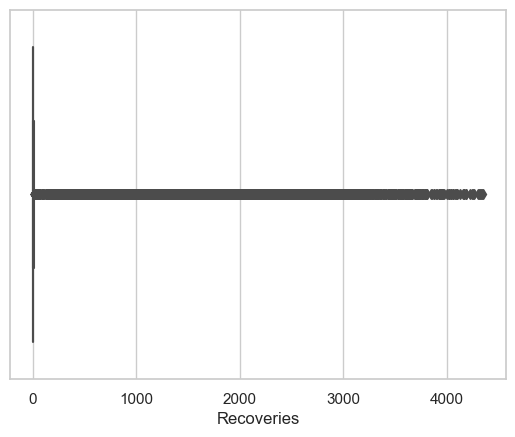

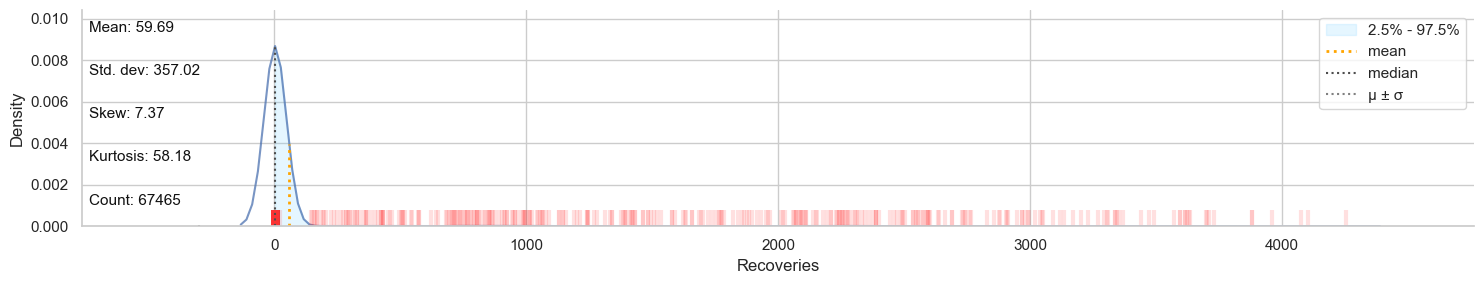

In [207]:
sns.set_theme(style="whitegrid")
sns.boxplot(df['Recoveries'])
kb.dist_plot(df['Recoveries'])

C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<AxesSubplot:xlabel='Recoveries', ylabel='Density'>

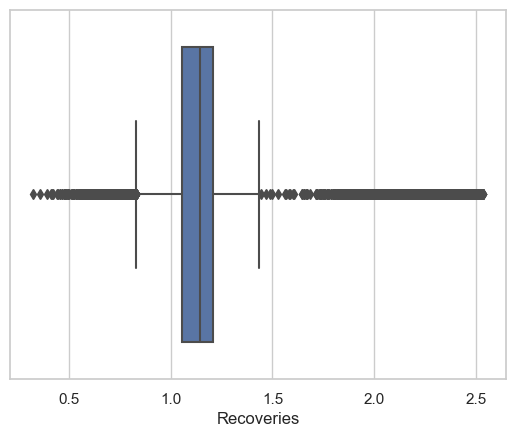

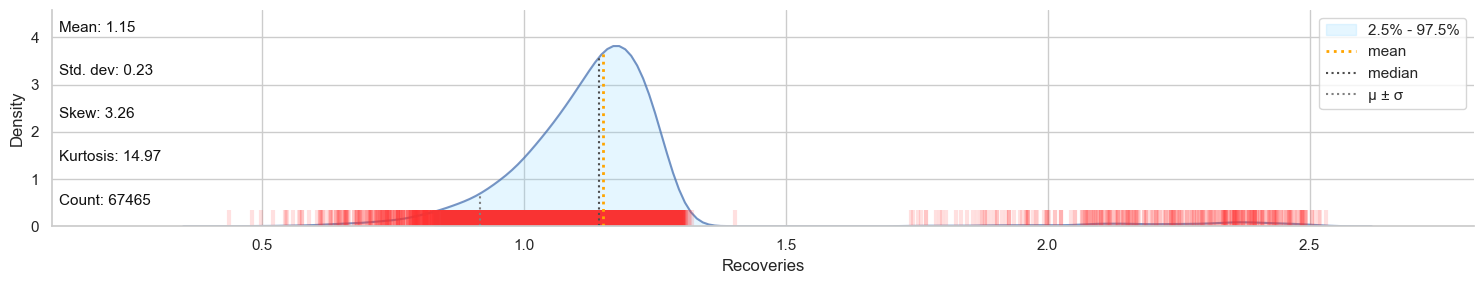

In [208]:
x=np.cbrt(df['Recoveries'])
x=np.cbrt(x)
sns.boxplot(x)
kb.dist_plot(x)

In [209]:
df['Recoveries']=np.cbrt(np.cbrt(df['Recoveries']))


- Total Collection Amount

C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<AxesSubplot:xlabel='Total Collection Amount', ylabel='Density'>

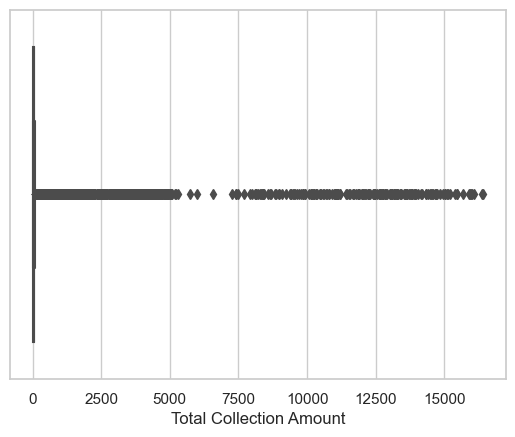

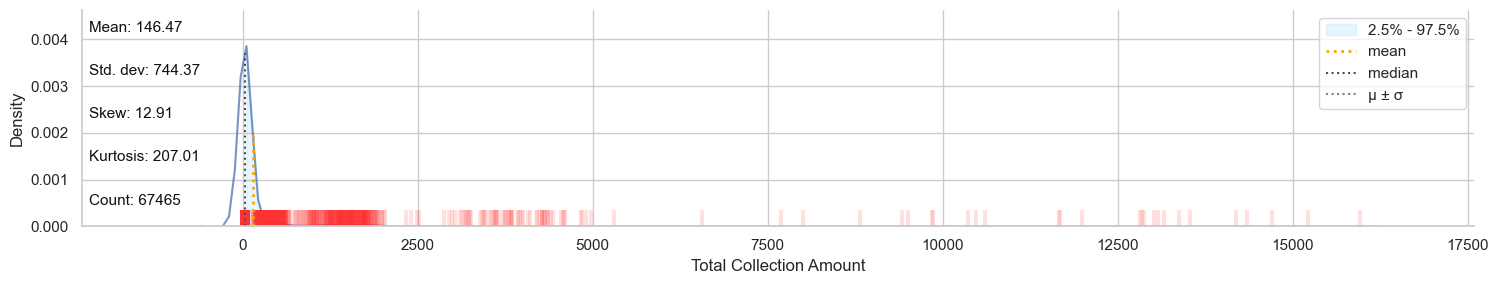

In [210]:
sns.set_theme(style="whitegrid")
sns.boxplot(df['Total Collection Amount'])
kb.dist_plot(df['Total Collection Amount'])

C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<AxesSubplot:xlabel='Total Collection Amount', ylabel='Density'>

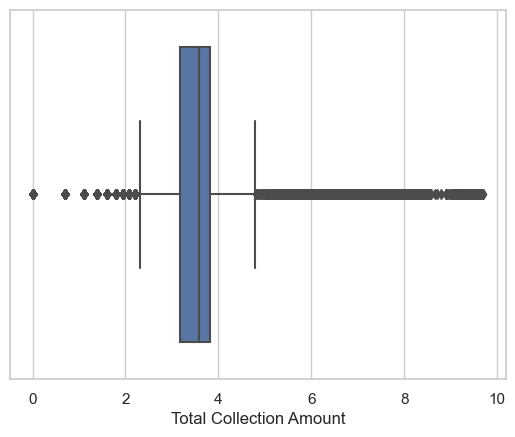

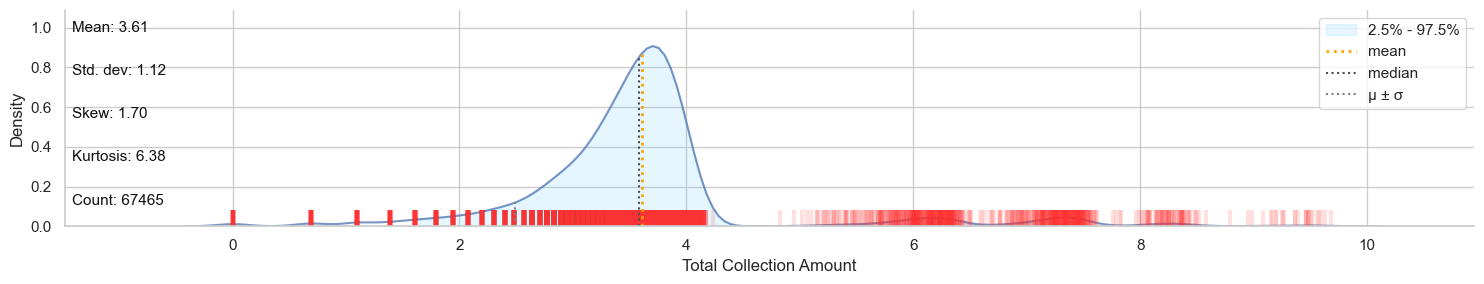

In [211]:
x=np.log(df['Total Collection Amount'])
sns.boxplot(x)
kb.dist_plot(x)

In [212]:
df['Total Collection Amount']=np.cbrt(df['Total Collection Amount'])

- Debit to Income

C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<AxesSubplot:xlabel='Open Account', ylabel='Density'>

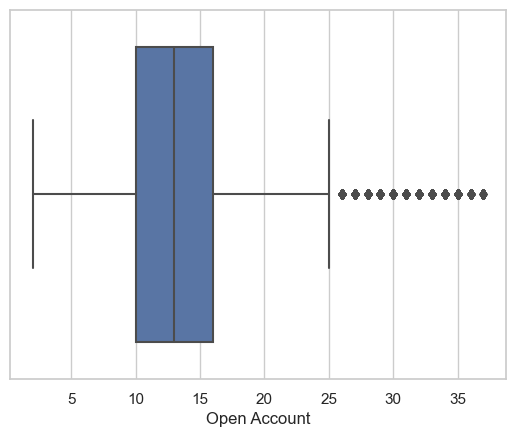

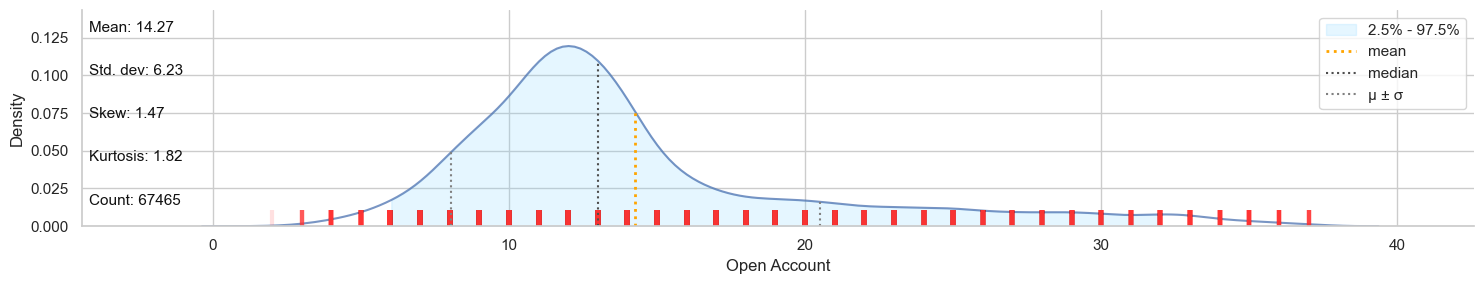

In [213]:
sns.boxplot(df['Open Account'])
kb.dist_plot(df['Open Account'])

C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<AxesSubplot:xlabel='Open Account', ylabel='Density'>

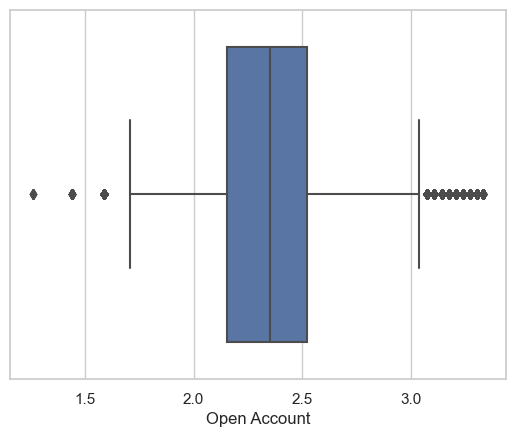

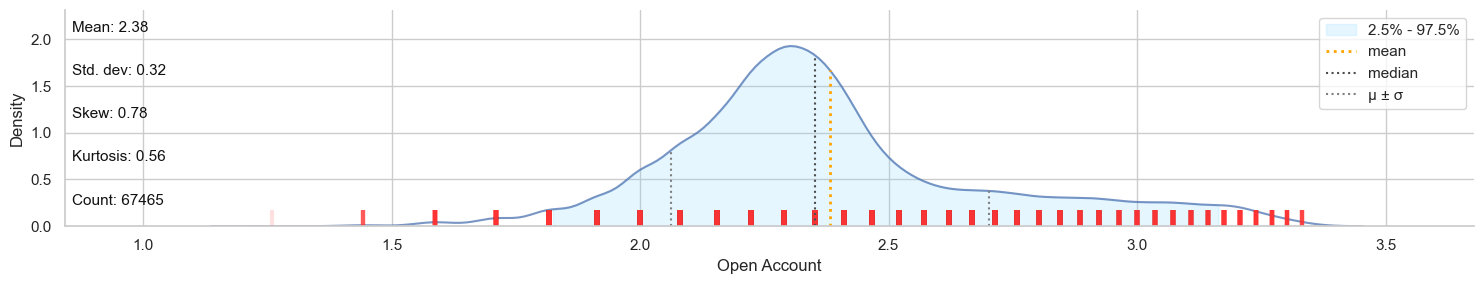

In [214]:
x=np.cbrt(df['Open Account'])
sns.boxplot(x)
kb.dist_plot(x)

C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<AxesSubplot:xlabel='Total Accounts', ylabel='Density'>

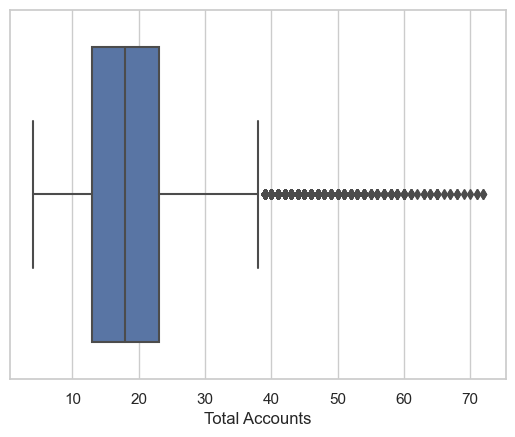

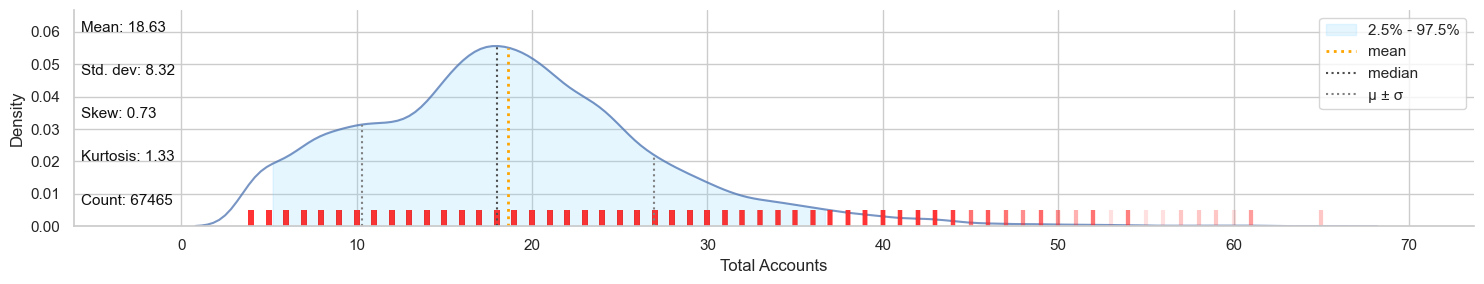

In [215]:
sns.boxplot(df['Total Accounts'])
kb.dist_plot(df['Total Accounts'])

C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<AxesSubplot:xlabel='Total Accounts', ylabel='Density'>

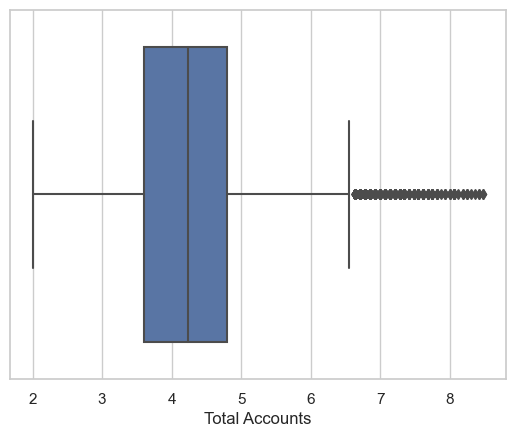

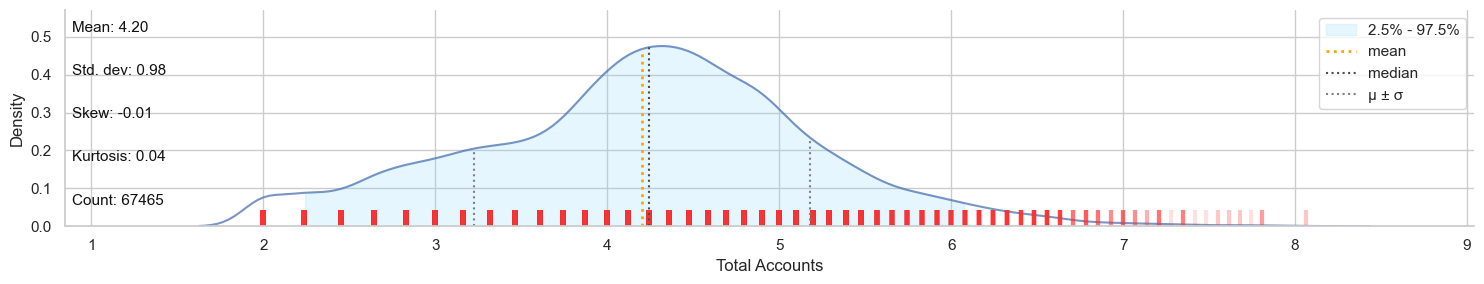

In [216]:
x=np.sqrt(df['Total Accounts'])
sns.boxplot(x)
kb.dist_plot(x)

In [217]:
df['Open Account']=np.cbrt(df['Open Account'])
df['Total Accounts']=np.sqrt(df['Total Accounts'])

In [218]:
df.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Grade,Sub Grade,Home Ownership,Employment Duration,Verification Status,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status,Classe_Batch_Enrolled,Classe_LoanTitle,Classe_last_week_pay
0,33018.0,11760,8911.377904,59.0,0.545139,1,30,2,11.118029,0,25.780390,0,0,3.301927,0,11.864210,56.114276,5.744563,0,11.980916,0.128598,0.699708,1.005686,0,0,3.684031,36.437812,16.629830,0,2,1,3
1,7313.0,10666,10046.328860,58.0,0.434539,0,2,2,11.549621,0,20.326700,0,0,2.289428,0,19.187434,64.129419,4.898979,0,13.719827,0.260563,1.184982,1.064480,0,0,2.802039,34.399554,20.574191,0,2,1,3
2,31097.0,6026,9711.729582,59.0,0.520105,1,19,2,11.357982,0,15.545161,2,0,3.072317,0,8.693376,48.138802,3.741657,1,11.959995,0.384378,1.254300,0.638096,0,0,2.620741,51.031379,28.889392,0,2,1,3
3,15169.0,21847,10714.459890,59.0,0.426088,2,4,2,11.627677,0,20.138060,0,0,2.668402,0,14.192908,96.424404,4.123106,0,7.915300,0.315697,0.685568,1.405363,0,0,3.391211,73.645738,22.522611,0,2,1,3
4,7037.0,27003,18795.931570,59.0,0.584824,0,10,2,10.749713,0,27.000438,1,0,2.410142,0,22.208081,84.992087,4.000000,1,7.896072,0.252241,0.963439,0.899602,0,0,2.668402,32.674486,30.730935,0,0,1,3


- Above we seen that Accounts Delinquent feature and Collection 12 months Medical feature has low varience so i am going to drop it

In [219]:
df.drop(['Accounts Delinquent'],axis=1,inplace=True)
df.drop(['Collection 12 months Medical'],axis=1,inplace=True)
df.drop(['Interest Rate'],axis=1,inplace=True)

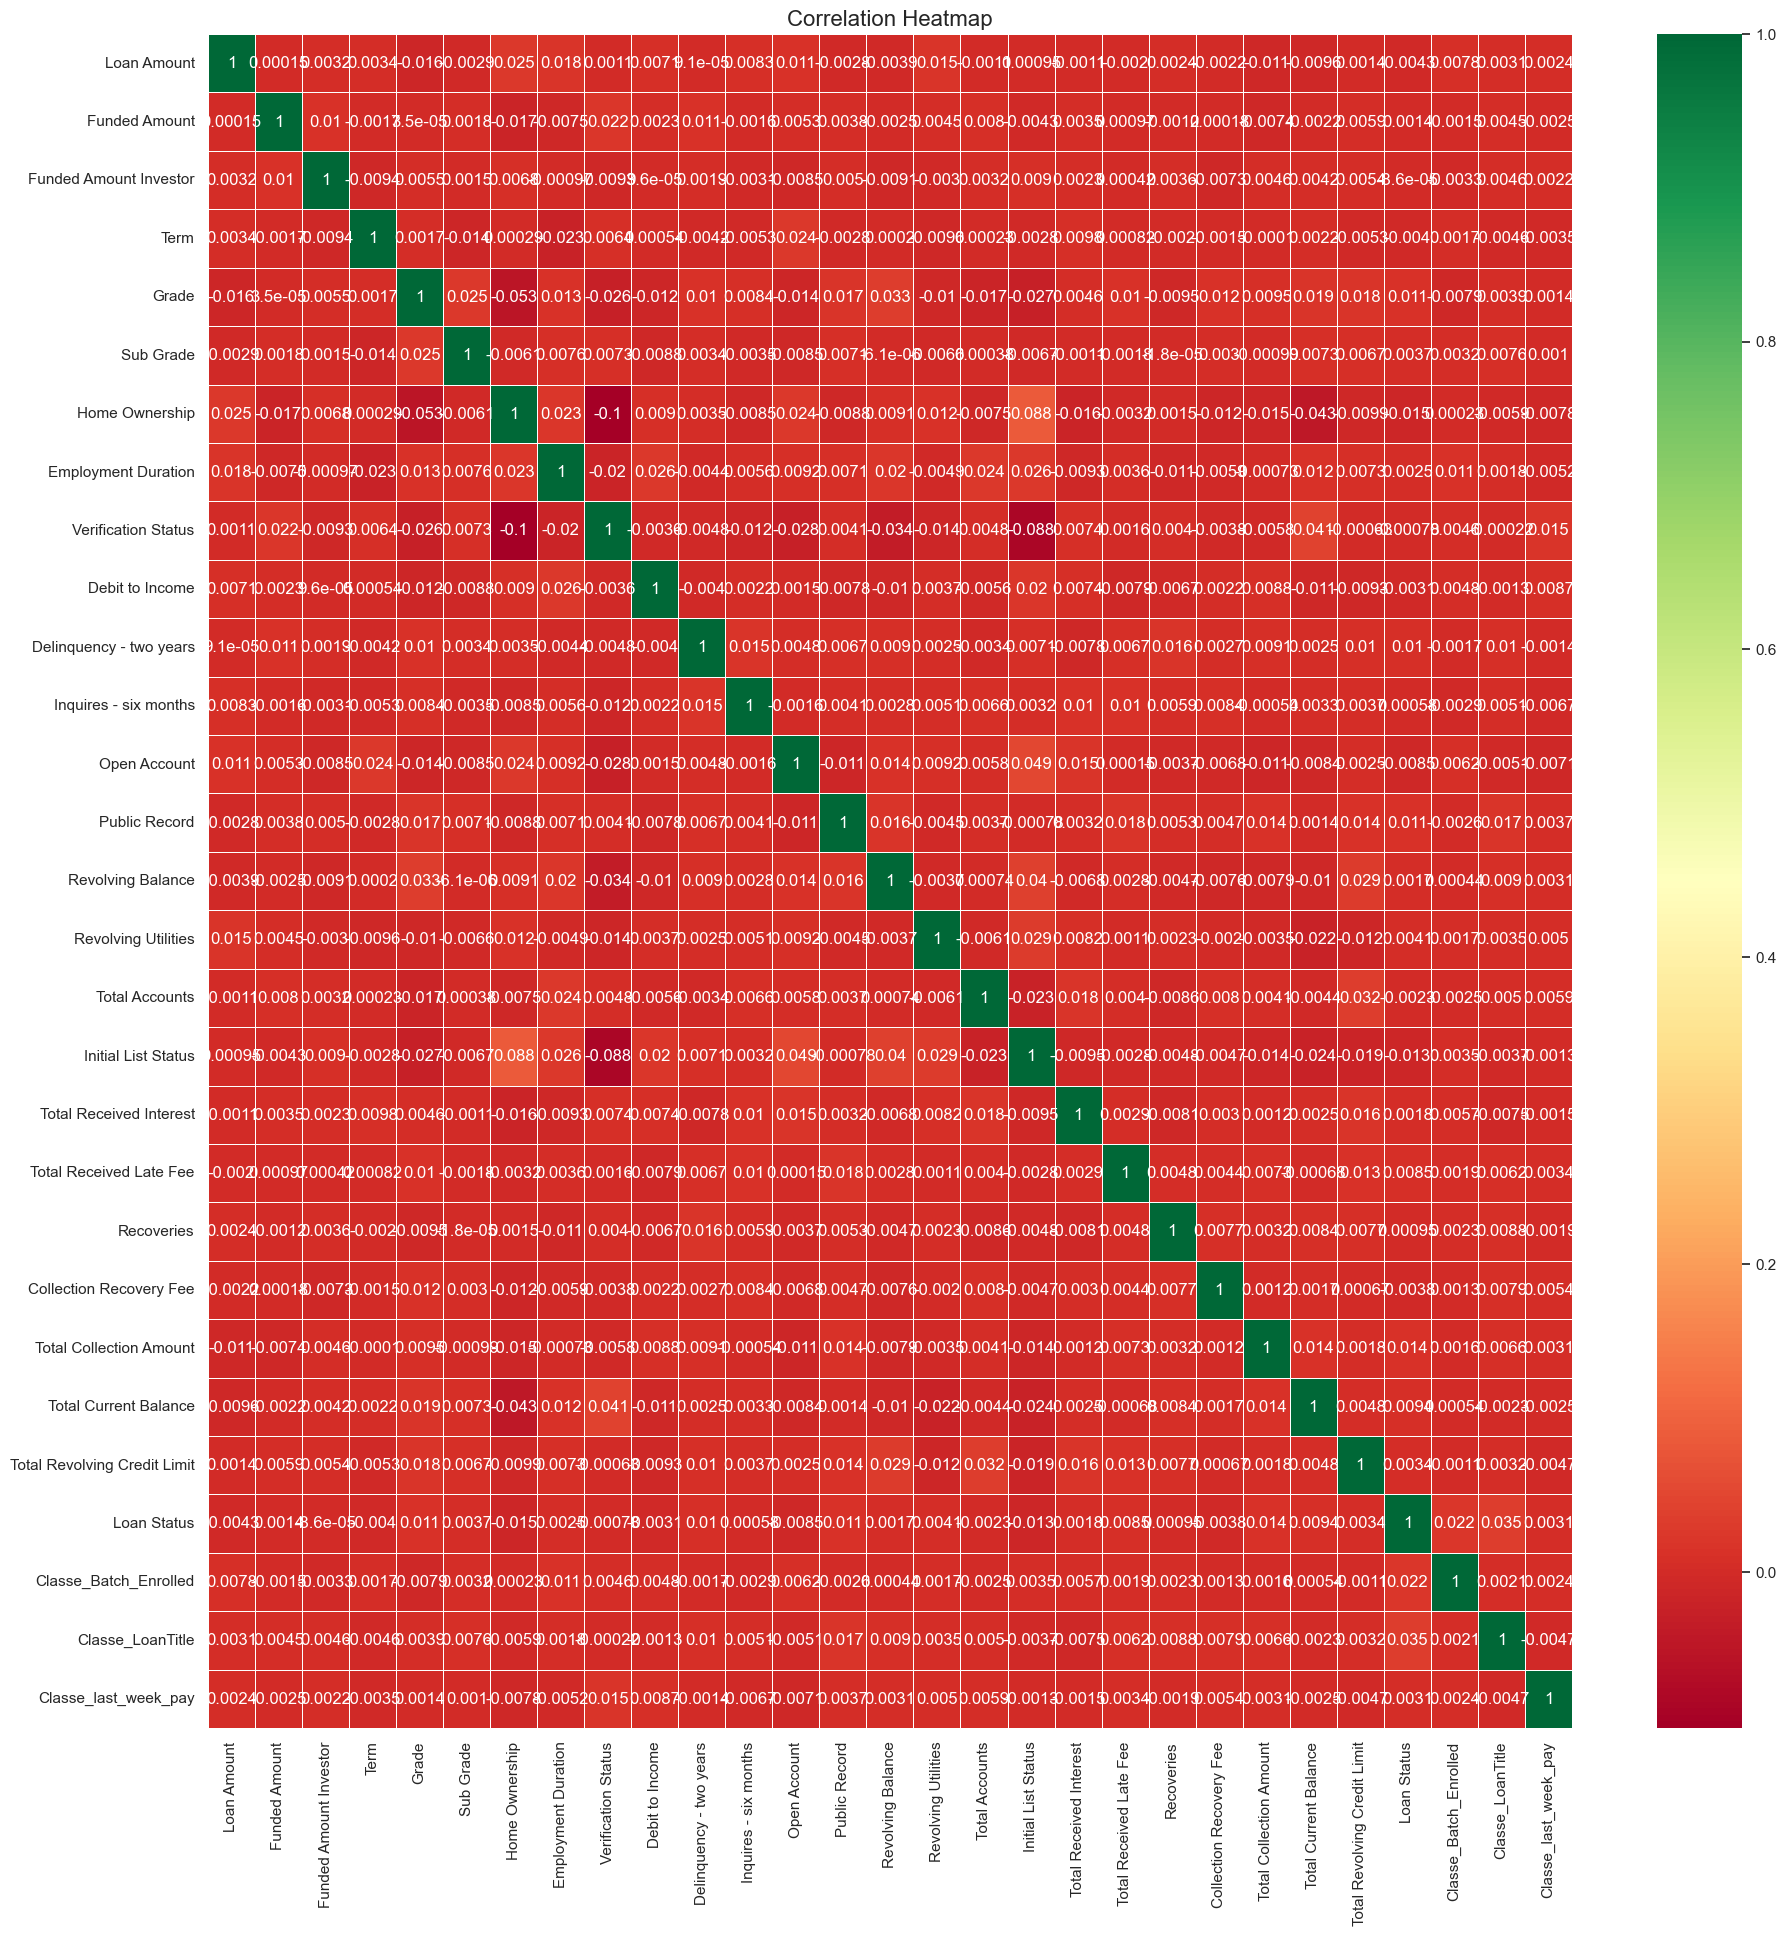

In [220]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Create a heatmap using Seaborn with a different colormap
plt.figure(figsize=(22,22))
sns.heatmap(corr_matrix, annot=True, cmap="RdYlGn", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

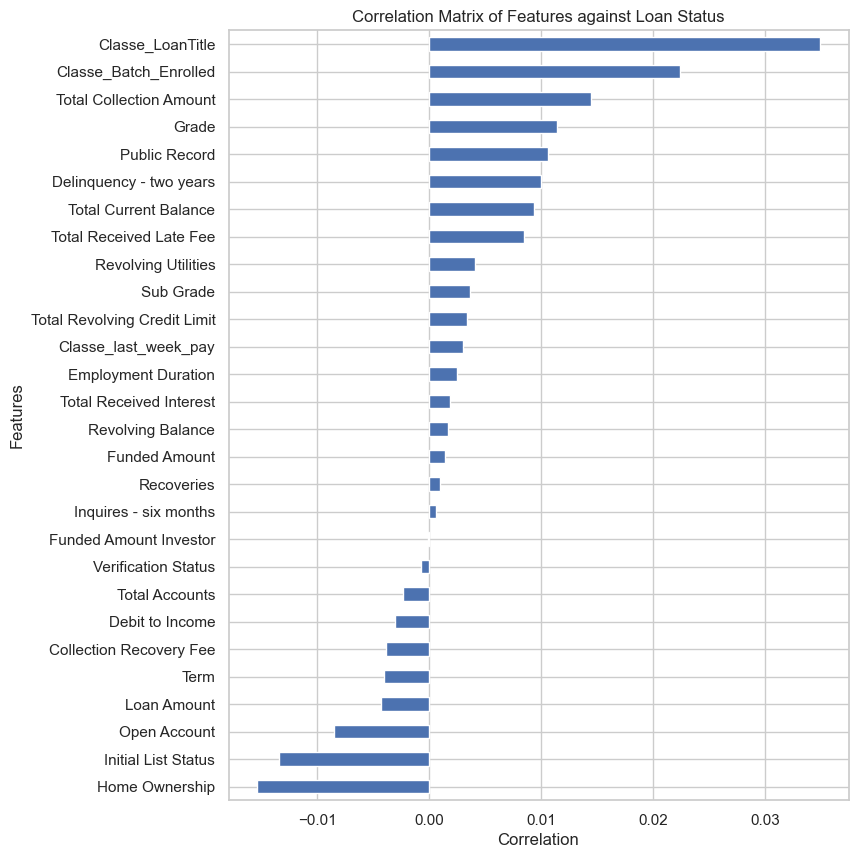

In [221]:
correlations = df.drop('Loan Status', axis=1).corrwith(df['Loan Status'])
# Sort the correlations
sorted_correlations = correlations.sort_values()

# Create the figure and plot
plt.figure(figsize=(8, 10))
sorted_correlations.plot(kind='barh')
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.title('Correlation Matrix of Features against Loan Status')

# Display the plot
plt.show()

In [222]:
# final df
df.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Grade,Sub Grade,Home Ownership,Employment Duration,Verification Status,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status,Classe_Batch_Enrolled,Classe_LoanTitle,Classe_last_week_pay
0,33018.0,11760,8911.377904,59.0,1,30,2,11.118029,0,25.780390,0,0,3.301927,0,11.864210,56.114276,5.744563,0,11.980916,0.128598,0.699708,1.005686,3.684031,36.437812,16.629830,0,2,1,3
1,7313.0,10666,10046.328860,58.0,0,2,2,11.549621,0,20.326700,0,0,2.289428,0,19.187434,64.129419,4.898979,0,13.719827,0.260563,1.184982,1.064480,2.802039,34.399554,20.574191,0,2,1,3
2,31097.0,6026,9711.729582,59.0,1,19,2,11.357982,0,15.545161,2,0,3.072317,0,8.693376,48.138802,3.741657,1,11.959995,0.384378,1.254300,0.638096,2.620741,51.031379,28.889392,0,2,1,3
3,15169.0,21847,10714.459890,59.0,2,4,2,11.627677,0,20.138060,0,0,2.668402,0,14.192908,96.424404,4.123106,0,7.915300,0.315697,0.685568,1.405363,3.391211,73.645738,22.522611,0,2,1,3
4,7037.0,27003,18795.931570,59.0,0,10,2,10.749713,0,27.000438,1,0,2.410142,0,22.208081,84.992087,4.000000,1,7.896072,0.252241,0.963439,0.899602,2.668402,32.674486,30.730935,0,0,1,3


In [225]:
# split data into X and Y
x=df.loc[:,['Loan Amount', 'Funded Amount',  'Term', 'Grade', 'Sub Grade', 'Home Ownership',
       'Employment Duration', 'Verification Status', 'Debit to Income',
       'Delinquency - two years',  'Open Account',
       'Public Record', 'Revolving Balance', 'Revolving Utilities',
       'Total Accounts', 'Initial List Status', 'Total Received Interest',
       'Total Received Late Fee', 'Recoveries', 
       'Total Collection Amount', 'Total Current Balance',
       'Total Revolving Credit Limit', 'Classe_Batch_Enrolled',
       'Classe_LoanTitle', 'Classe_last_week_pay']]

y=df.loc[:,'Loan Status']

In [226]:
x.shape

(67465, 25)

In [227]:
y.shape

(67465,)

In [228]:
#!pip install imblearn

## Handeling Imbalanced Dataset

I observed in EDA dataset is imbalanced,so I balance the dataset by oversampling method

In [229]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
smote.fit(x,y)
x,y=smote.fit_resample(x,y)

In [230]:
x.shape

(122448, 25)

In [231]:
y.shape

(122448,)

Text(0.5, 1.0, 'Target Variable After Balanced')

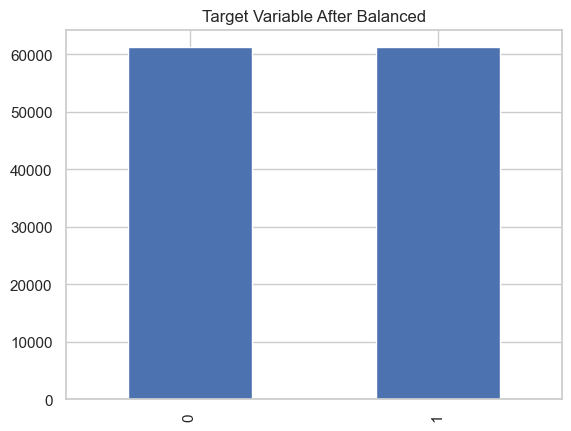

In [232]:
y.value_counts().plot(kind='bar')
plt.title('Target Variable After Balanced')

In [233]:
from sklearn.preprocessing import StandardScaler 
sc=StandardScaler()


In [234]:
#df1=df.sample(2000,ignore_index=True)
#df1.head()

## split dataset into training and testing

In [235]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,log_loss

In [236]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)
print('x_train.shape', x_train.shape)
print('x_test.shape', x_test.shape)
print('y_train.shape', y_train.shape)
print('y_test.shape', y_test.shape)

x_train.shape (97958, 25)
x_test.shape (24490, 25)
y_train.shape (97958,)
y_test.shape (24490,)


In [237]:
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

# Model building

## Logistic Reggression

In [238]:
from sklearn.linear_model import LogisticRegression

In [239]:
le=LogisticRegression()
le.fit(x_train,y_train)
y_pred=le.predict(x_test)
clp=classification_report(y_test,y_pred,digits=3)
print("classification Report:\n", clp)
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n", cm)

classification Report:
               precision    recall  f1-score   support

           0      0.721     0.677     0.699     12402
           1      0.688     0.732     0.709     12088

    accuracy                          0.704     24490
   macro avg      0.705     0.704     0.704     24490
weighted avg      0.705     0.704     0.704     24490

Confusion Matrix:
 [[8396 4006]
 [3241 8847]]


In [240]:
y_test[0:10]

2893      0
67124     0
23046     0
81684     1
107100    1
101686    1
87319     1
116168    1
19911     0
68849     1
Name: Loan Status, dtype: int64

In [241]:
y_pred[:100]

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

In [242]:
y_predp=le.predict_proba(x_test)
y_predp

array([[0.63671354, 0.36328646],
       [0.619177  , 0.380823  ],
       [0.88604223, 0.11395777],
       ...,
       [0.86805245, 0.13194755],
       [0.69884541, 0.30115459],
       [0.68391628, 0.31608372]])

In [243]:
print('training score',le.score(x_train,y_train))
print('testing score',le.score(x_test,y_test))

training score 0.7033626656322097
testing score 0.7040832993058391


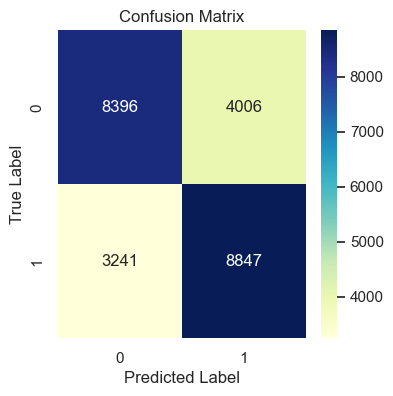

In [245]:
plt.figure(figsize=(4, 4))  # Set the figure size to your desired dimensions
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt='d')  # Use 'd' instead of 'g' to display integer values
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

- The model's predictions are summarized in the confusion matrix. It demonstrates that 8784 default cases (true positives) and 8423 non-default instances (true negatives) were accurately predicted by the model. Additionally, it incorrectly identified 3304 default instances as non-default and 3979 non-default instances as default (false negatives and false positive).

## Decision Tree

In [246]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [247]:
dc=DecisionTreeClassifier(max_depth=25,min_samples_leaf=3,min_samples_split=100,criterion='entropy')
dc.fit(x_train,y_train)
y_pred=dc.predict(x_test)
clp=classification_report(y_test,y_pred,digits=3)
print("classification Report:\n", clp)
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n", cm)

classification Report:
               precision    recall  f1-score   support

           0      0.810     0.855     0.832     12402
           1      0.842     0.794     0.817     12088

    accuracy                          0.825     24490
   macro avg      0.826     0.824     0.824     24490
weighted avg      0.826     0.825     0.825     24490

Confusion Matrix:
 [[10599  1803]
 [ 2490  9598]]


In [248]:
y_pred[0:10]

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 1], dtype=int64)

In [249]:
dc.score(x_train,y_train)

0.8646460728067131

In [250]:
y_predp1=dc.predict_proba(x_test)

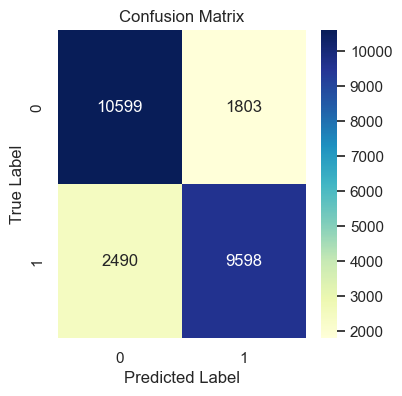

In [251]:
plt.figure(figsize=(4, 4))  # Set the figure size to your desired dimensions
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt='d')  # Use 'd' instead of 'g' to display integer values
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

##  Random Forest

In [252]:
from sklearn.ensemble import RandomForestClassifier

In [253]:
rf=RandomForestClassifier(criterion='entropy')
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
clp=classification_report(y_test,y_pred,digits=3)
print("classification Report:\n", clp)
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n", cm)

classification Report:
               precision    recall  f1-score   support

           0      0.878     0.935     0.906     12402
           1      0.929     0.867     0.897     12088

    accuracy                          0.902     24490
   macro avg      0.904     0.901     0.901     24490
weighted avg      0.903     0.902     0.901     24490

Confusion Matrix:
 [[11598   804]
 [ 1606 10482]]


In [254]:
y_pred[0:10]

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [255]:
y_predp1=dc.predict_proba(x_test)


In [256]:
print('training score',rf.score(x_train,y_train))
print('testing score',rf.score(x_test,y_test))
log_loss(y_test,y_pred)

training score 1.0
testing score 0.9015924867292773


3.3989013470015776

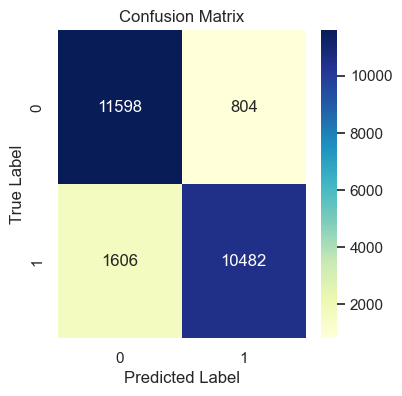

In [257]:
plt.figure(figsize=(4, 4))  # Set the figure size to your desired dimensions
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt='d')  # Use 'd' instead of 'g' to display integer values
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [258]:
rfc=RandomForestClassifier(max_depth=23, min_samples_leaf=2, min_samples_split=60,
                       n_estimators=100,criterion='entropy')
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=23, min_samples_leaf=2,
                       min_samples_split=60)

In [259]:

y_pred=rfc.predict(x_test)
clp=classification_report(y_test,y_pred,digits=3)
print("classification Report:\n", clp)
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n", cm)

classification Report:
               precision    recall  f1-score   support

           0      0.821     0.900     0.859     12402
           1      0.887     0.799     0.841     12088

    accuracy                          0.850     24490
   macro avg      0.854     0.850     0.850     24490
weighted avg      0.854     0.850     0.850     24490

Confusion Matrix:
 [[11168  1234]
 [ 2428  9660]]


In [260]:
rfc.score(x_train,y_train)

0.8830315032973315

In [261]:
y_predp2=rfc.predict_proba(x_test)

In [262]:
log_loss(y_test,y_pred)

5.164638050689742

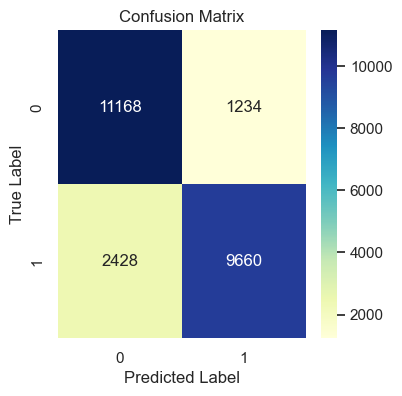

In [263]:
plt.figure(figsize=(4, 4))  # Set the figure size to your desired dimensions
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt='d')  # Use 'd' instead of 'g' to display integer values
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [157]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [158]:
# NO of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=500,stop=1000,num=10)]
#NO of features consider at every split
max_features=['auto']
#maximum no of levels in tree
max_depth=[int(x) for x in np.linspace(5,25,num=5)]
#minimum no of sample  required to split
min_sample_split=[50,60,80,100,120]
#min no of sample required at each leaf node
min_sample_leaf=[1,2,3,5]

In [159]:
random_grid={'n_estimators':n_estimators,
   'max_features':max_features,
    'max_depth':max_depth,
   'min_samples_split':min_sample_split,
   'min_samples_leaf':min_sample_leaf}

In [160]:
rs=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,cv=8,n_iter=6,verbose=2,n_jobs=1)
rs

RandomizedSearchCV(cv=8, estimator=RandomForestClassifier(criterion='entropy'),
                   n_iter=6, n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25],
                                        'max_features': ['auto'],
                                        'min_samples_leaf': [1, 2, 3, 5],
                                        'min_samples_split': [50, 60, 80, 100,
                                                              120],
                                        'n_estimators': [500, 555, 611, 666,
                                                         722, 777, 833, 888,
                                                         944, 1000]},
                   verbose=2)

In [264]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

0.7716122260868025


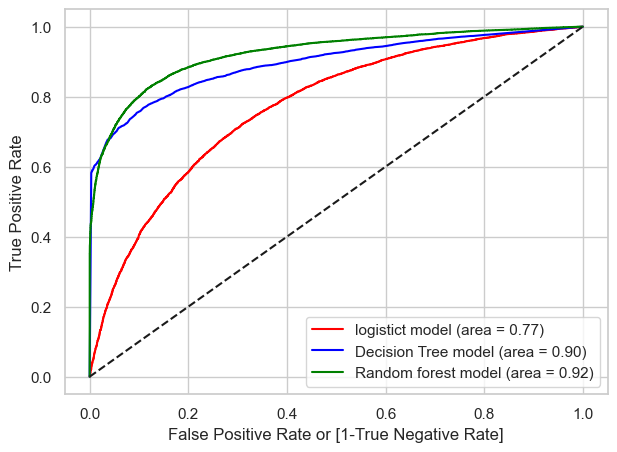

In [265]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test,y_predp[:,1])
fpr1, tpr1, thresholds1 = roc_curve(y_test,y_predp1[:,1],)
fpr2, tpr2, thresholds2 = roc_curve(y_test,y_predp2[:,1])
auc = roc_auc_score(y_test,y_predp[:,1])
auc1 = roc_auc_score(y_test,y_predp1[:,1])
auc2 = roc_auc_score(y_test,y_predp2[:,1])
print(auc)
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
plt.plot(fpr,tpr,color='red', label='logistict model (area = %0.2f)'%auc)
plt.plot(fpr1,tpr1,color='blue', label='Decision Tree model (area = %0.2f)'%auc1)
plt.plot(fpr2,tpr2,color='green', label='Random forest model (area = %0.2f)'%auc2)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1-True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend()